In [1]:
# Imports
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from timeit import default_timer as timer

plt.rcParams["figure.figsize"] = (20,10)

In [ ]:
# Parameters 
# ATTEMPT_NAME="LSTM_BASELINE"
# DATASET_FILE_PATH= ["Datasets\\uniformdata.xlsx", "Datasets\\uniformdata.xlsx", "Datasets\\uniformdata.xlsx", "Datasets\\uniformdata.xlsx", "Datasets\\uniformdata.xlsx"]
# DATASET_SHEET_TITLE= ["data_uniforma", "data_uniformb", "data_uniformc", "data_uniformd", "data_uniforme"]
# GRANULARITY=10
# STEP_SIZE_SLIDING_WINDOW=5
# PAST_HISTORY=20
# FUTURE_TARGET=1
# VAL_PERCENT=0.1
# EPOCHS=5
# BATCH_SIZE=10
# SMOOTHING=50
# SHUFFLE_BUFFER_SIZE=100
# MEAN=False
# USE_REF_POINTS=False
# REF_POINT1=0
# REF_POINT2=7

In [ ]:
def run_all(DATASET_FILE_PATH, DATASET_SHEET_TITLE, GRANULARITY, STEP_SIZE_SLIDING_WINDOW, PAST_HISTORY, 
            FUTURE_TARGET, VAL_PERCENT, EPOCHS, BATCH_SIZE, SMOOTHING, ATTEMPT_NAME, SHUFFLE_BUFFER_SIZE, MEAN,
            USE_REF_POINTS, REF_POINT1, REF_POINT2): 
    batch_train, batch_val, batch_test, test_ground_truth, train_slices, val_slices, test_data_indexes, data_shape = process_data(
        DATASET_FILE_PATH, DATASET_SHEET_TITLE, GRANULARITY, SMOOTHING, VAL_PERCENT, PAST_HISTORY, 
        FUTURE_TARGET, STEP_SIZE_SLIDING_WINDOW, BATCH_SIZE, EPOCHS, SHUFFLE_BUFFER_SIZE, MEAN, 
        USE_REF_POINTS, REF_POINT1, REF_POINT2)
    model, training_history, training_time = run_cnn(data_shape, batch_train, batch_val, train_slices, 
                                                      val_slices, BATCH_SIZE, EPOCHS, FUTURE_TARGET) 
    evaluate_results(model, training_history, test_ground_truth, batch_test, test_data_indexes, training_time)

In [2]:
# Load components
%run ./data_management_component.ipynb

In [ ]:
%run ./cnn_baseline.ipynb

In [ ]:
%run ./lstm_baseline.ipynb

In [ ]:
%run ./nn_baseline.ipynb

In [ ]:
%run ./parallel_model.ipynb

In [ ]:
%run ./parallel_model_deep.ipynb

In [ ]:
%run ./evaluation_component.ipynb

Working on dataset: Datasets\SingleSessionData.xlsx data_Uniform TRAIN SET number 0


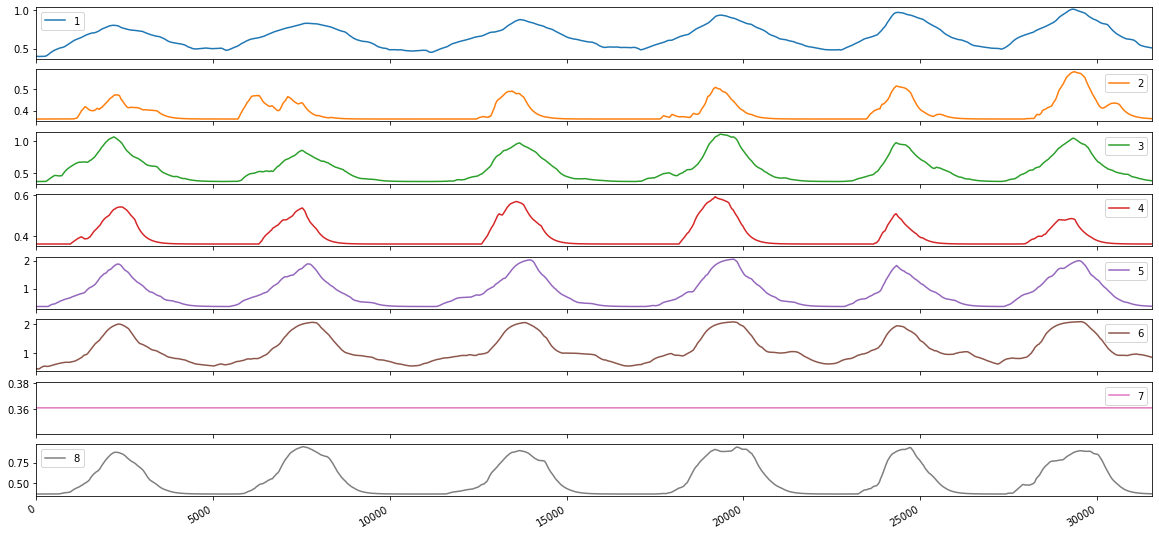

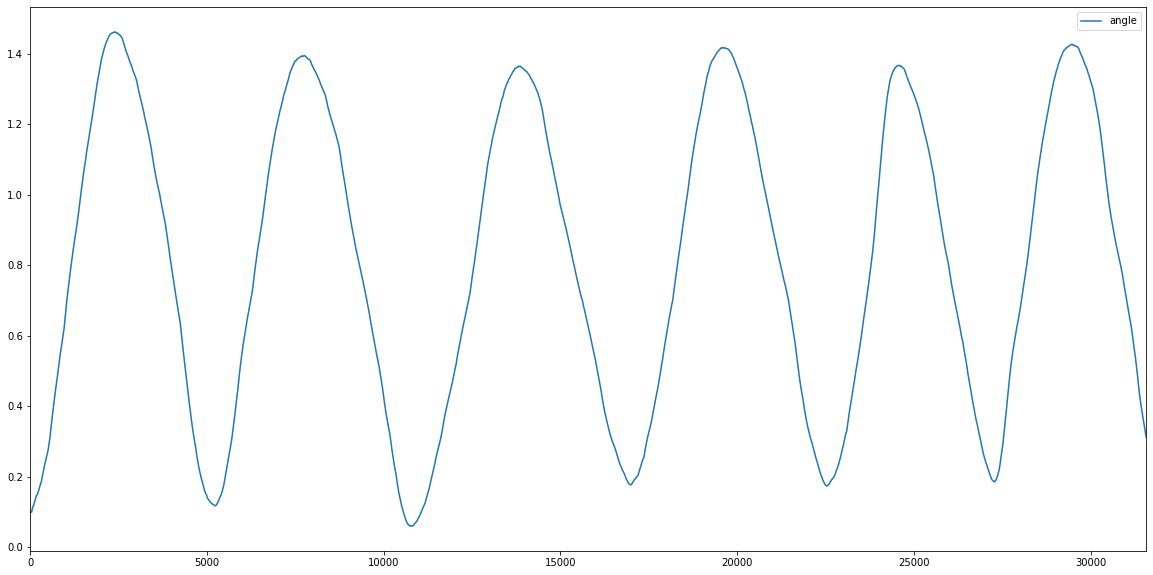

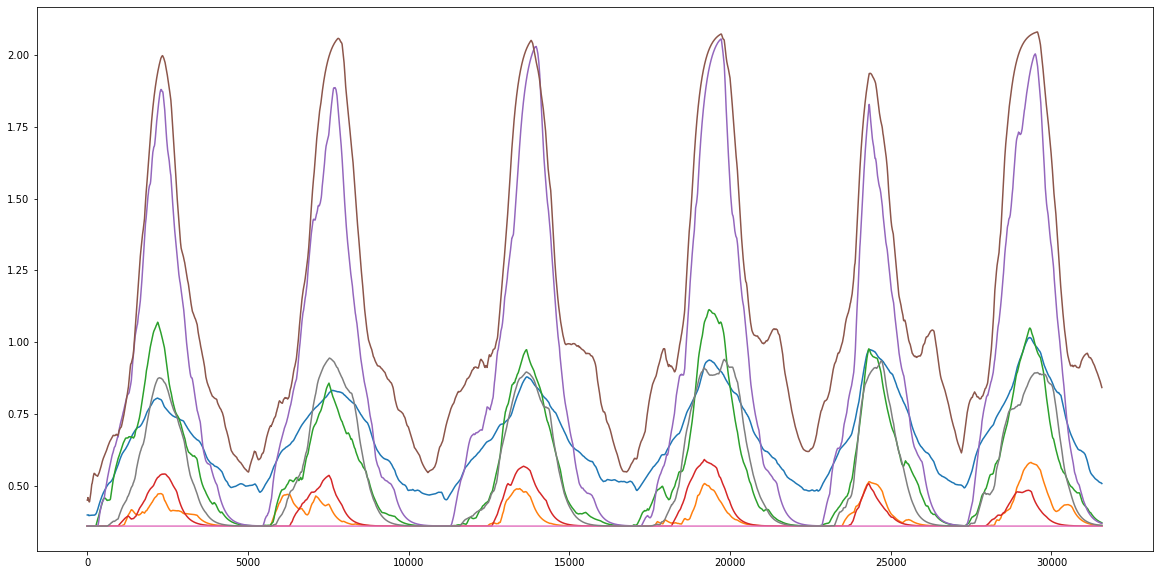

(2584, 100, 8) (373, 100, 8)
2584 0
Working on dataset: Datasets\SingleSessionData.xlsx data_NonUniform TRAIN SET number 1


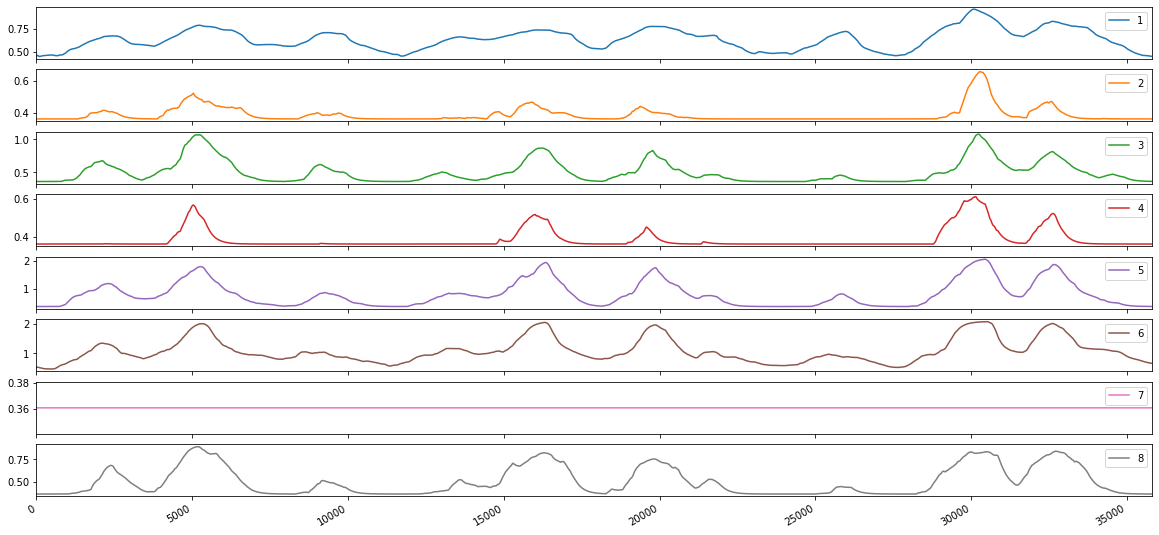

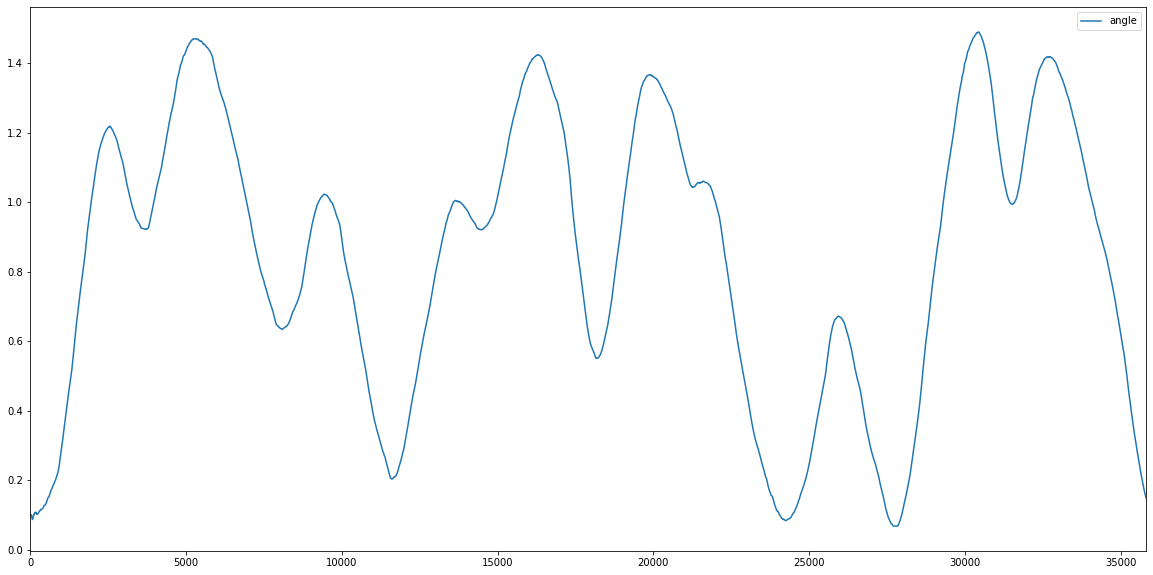

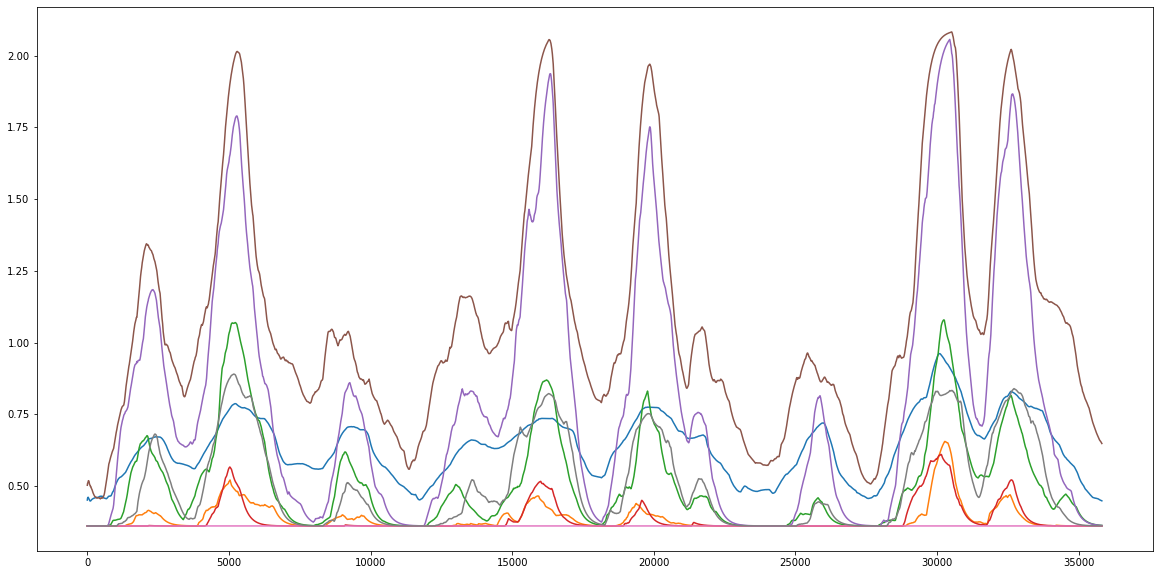

(2945, 100, 8) (437, 100, 8)
5529 373
Working on dataset: Datasets\SingleSessionData.xlsx data_NonUniformWithPause TRAIN SET number 2


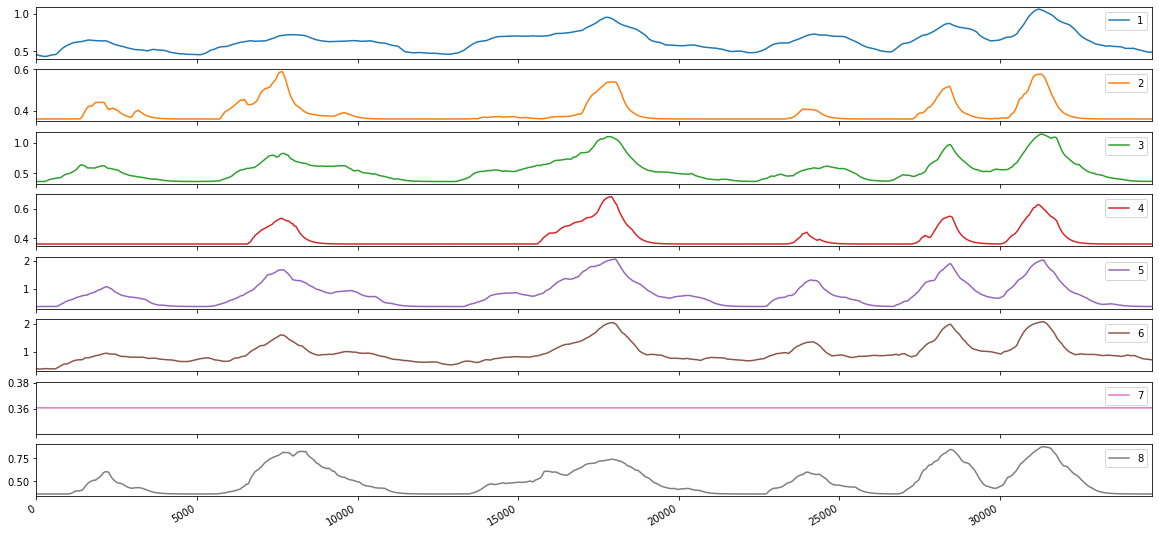

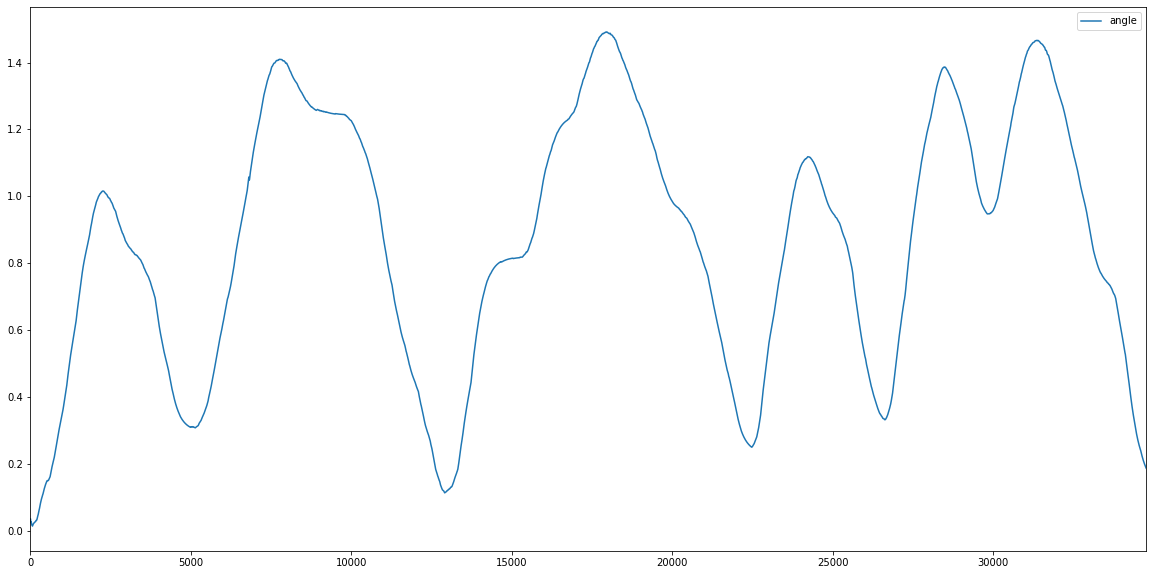

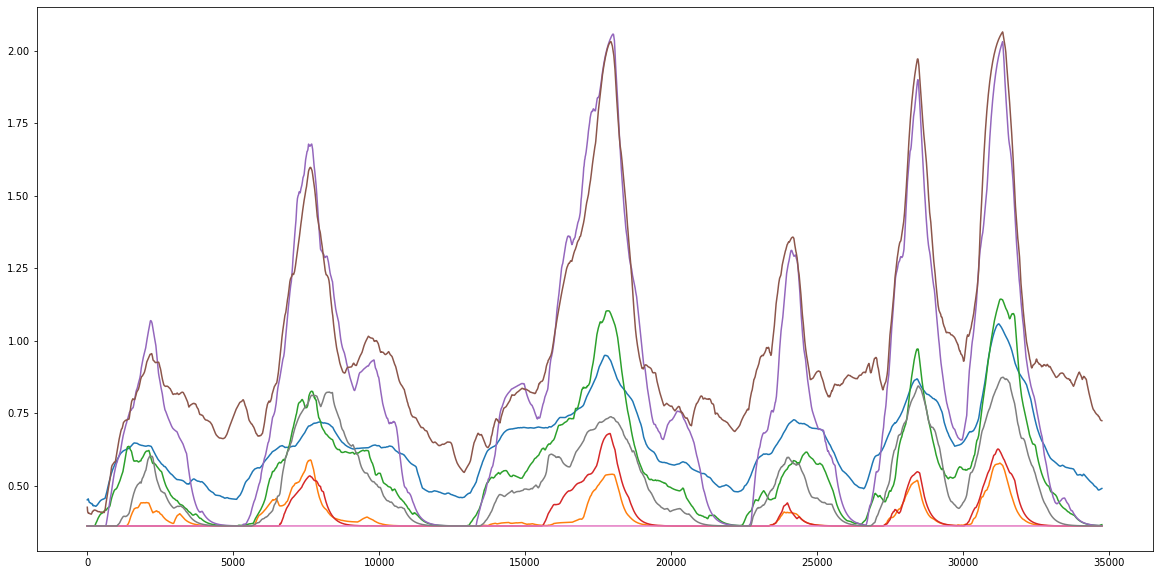

(2855, 100, 8) (421, 100, 8)
8384 810
Working on dataset: Datasets\SingleSessionData.xlsx data_NonUniformTwo TRAIN SET number 3


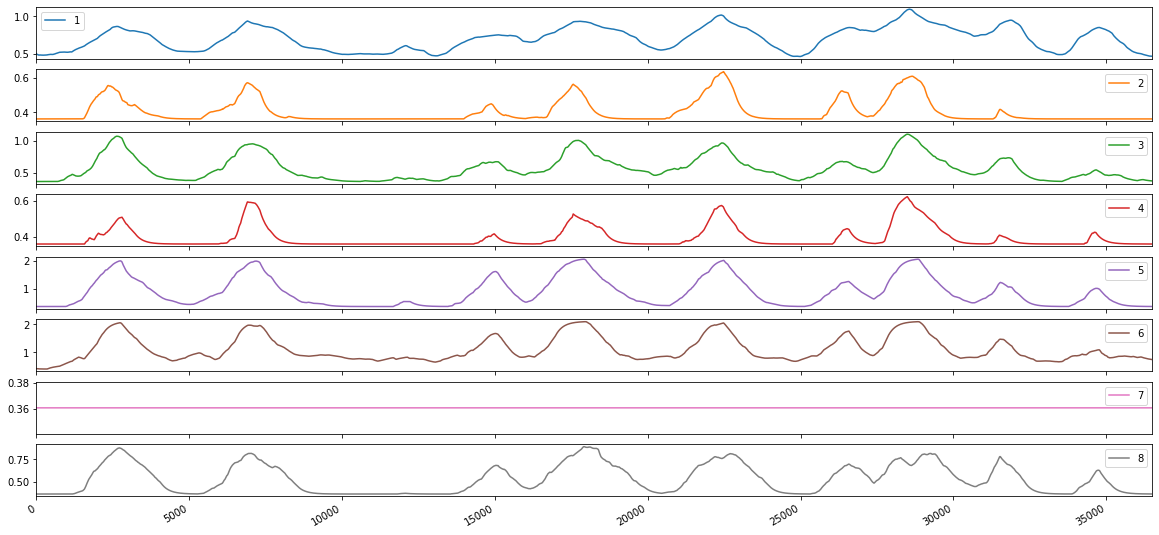

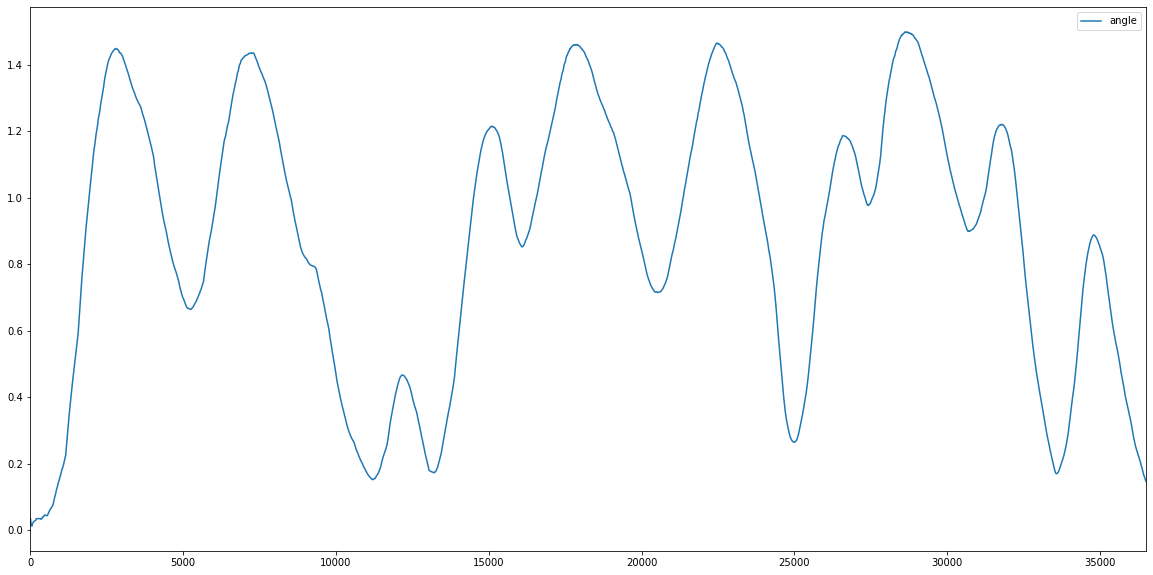

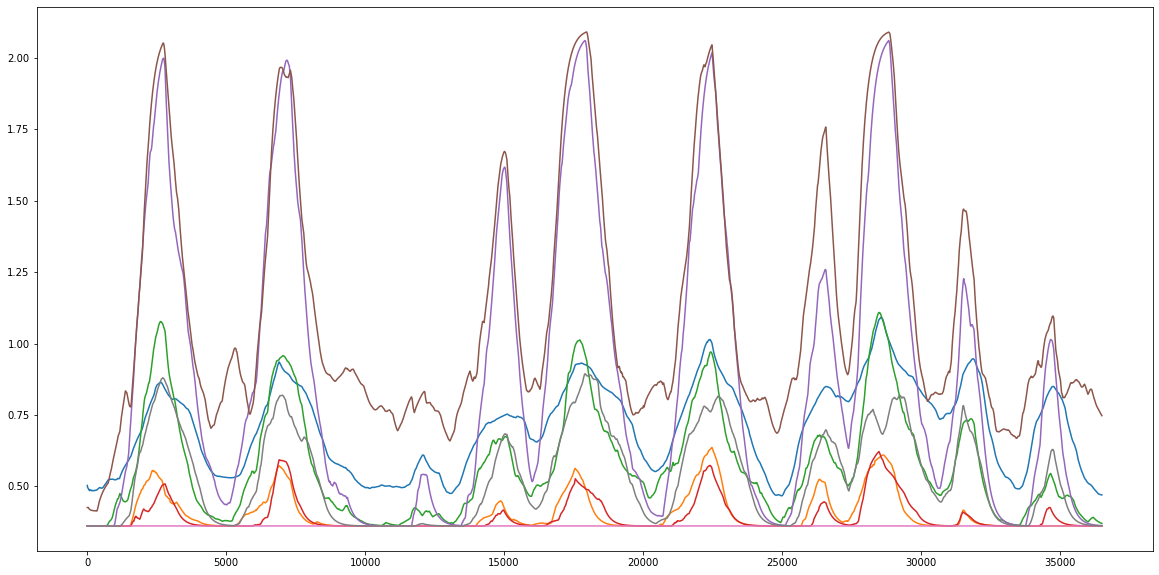

(3004, 100, 8) (447, 100, 8)
11388 1231
Working on dataset: Datasets\SingleSessionData.xlsx data_UniformWithPause TRAIN SET number 4


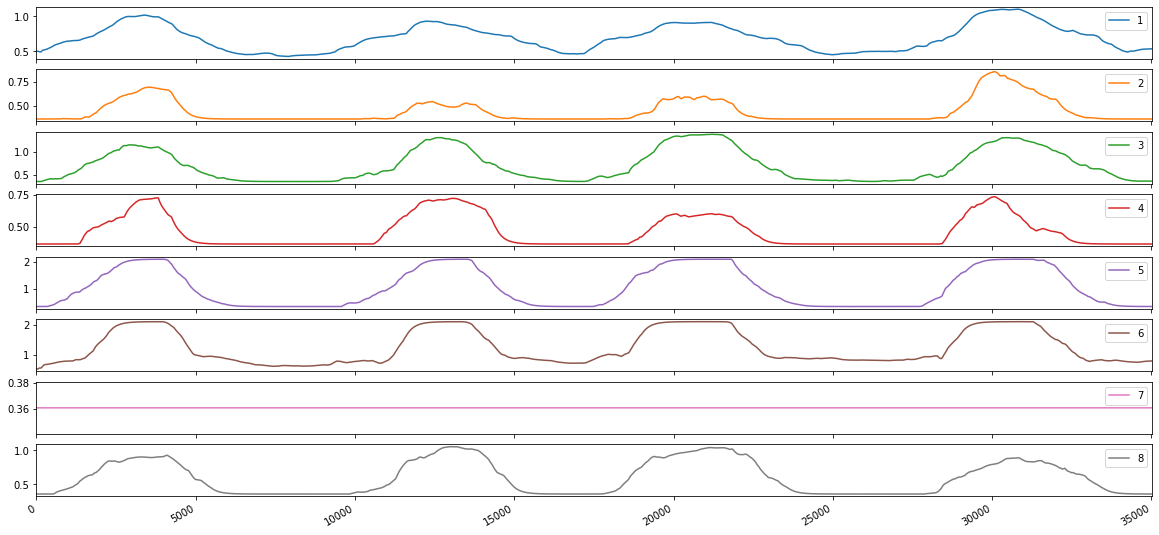

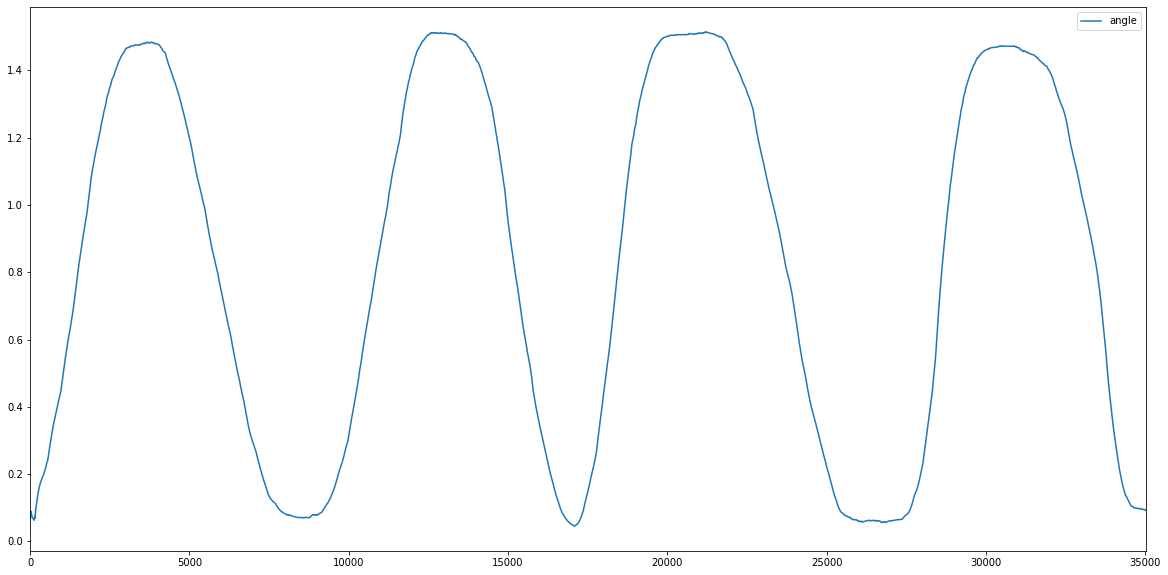

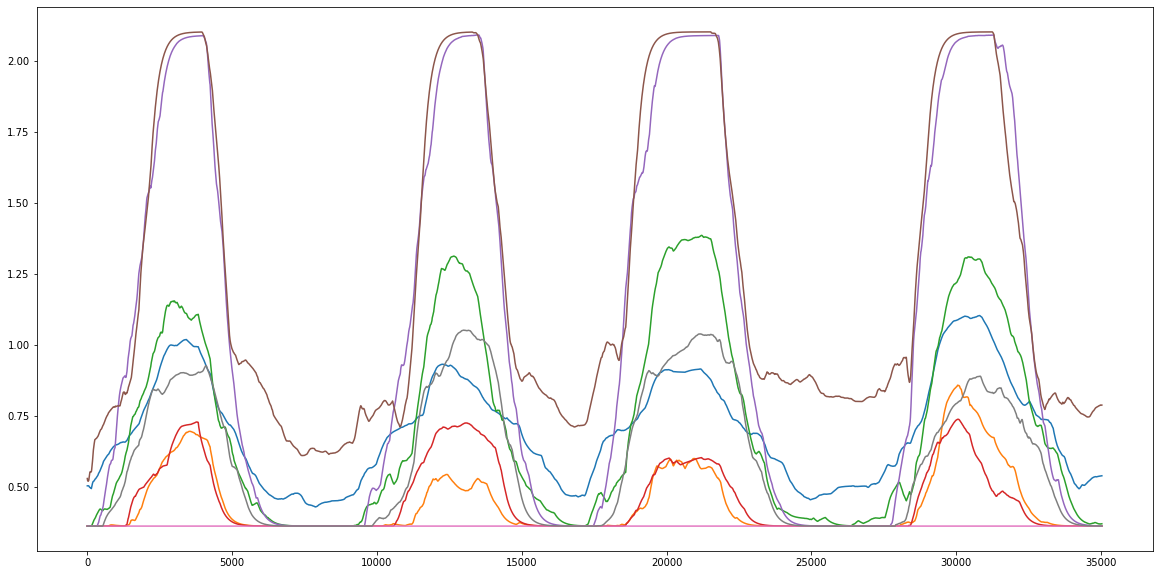

(2878, 100, 8) (425, 100, 8)
14266 1678
Working on dataset: Datasets\SessionToSessionOne.xlsx data_Uniform TRAIN SET number 5


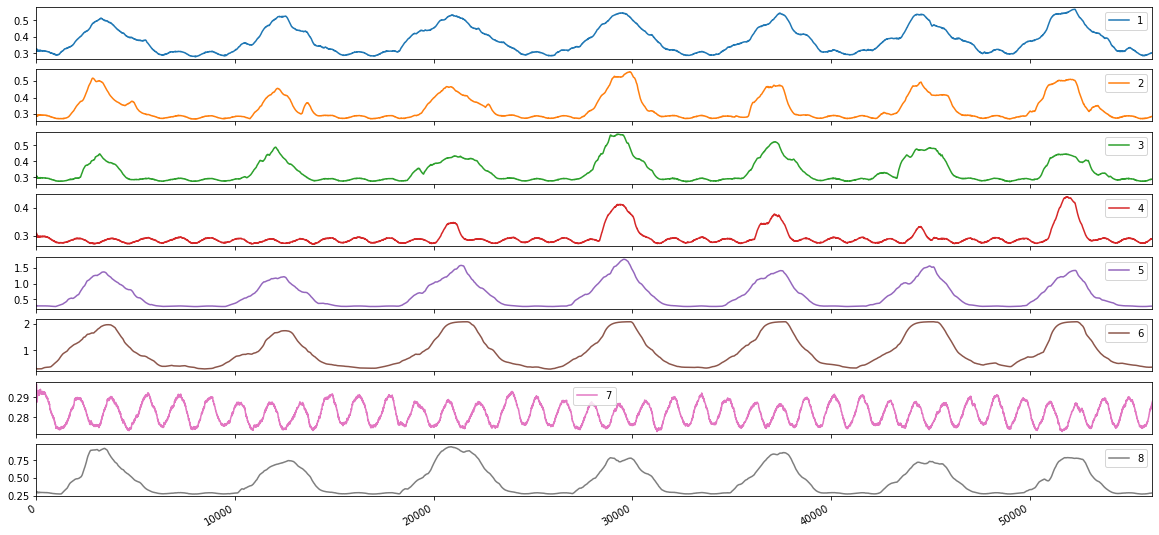

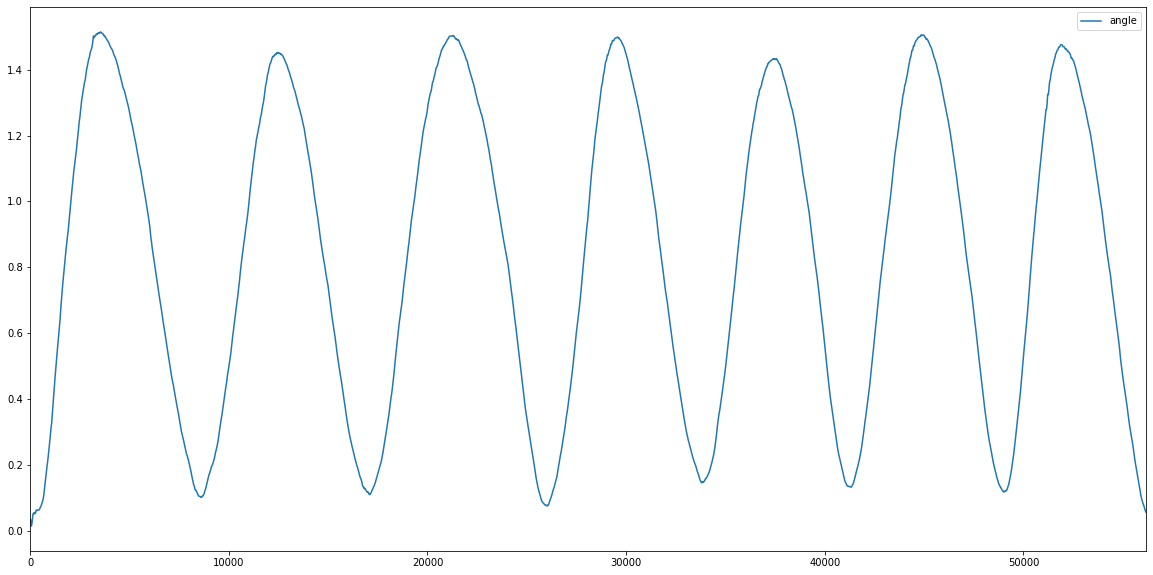

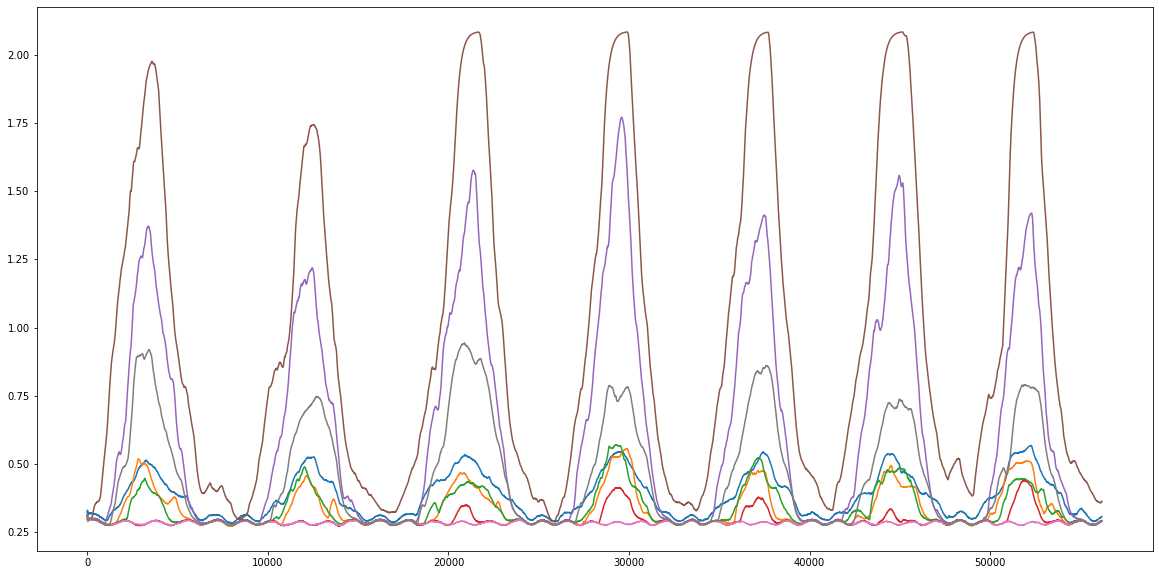

(4676, 100, 8) (742, 100, 8)
18942 2103
Working on dataset: Datasets\SessionToSessionOne.xlsx data_NonUniform TRAIN SET number 6


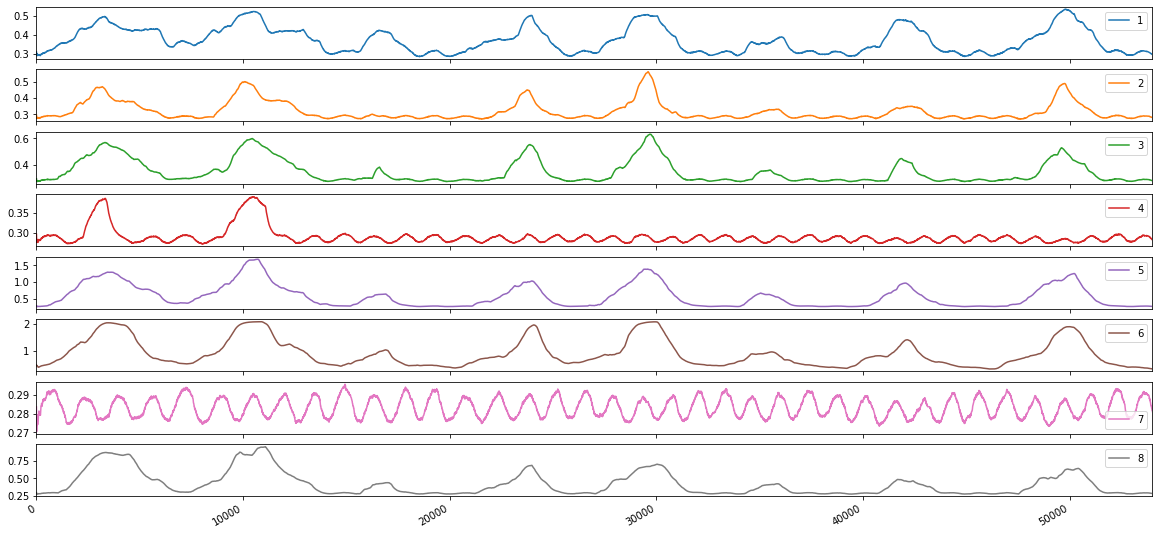

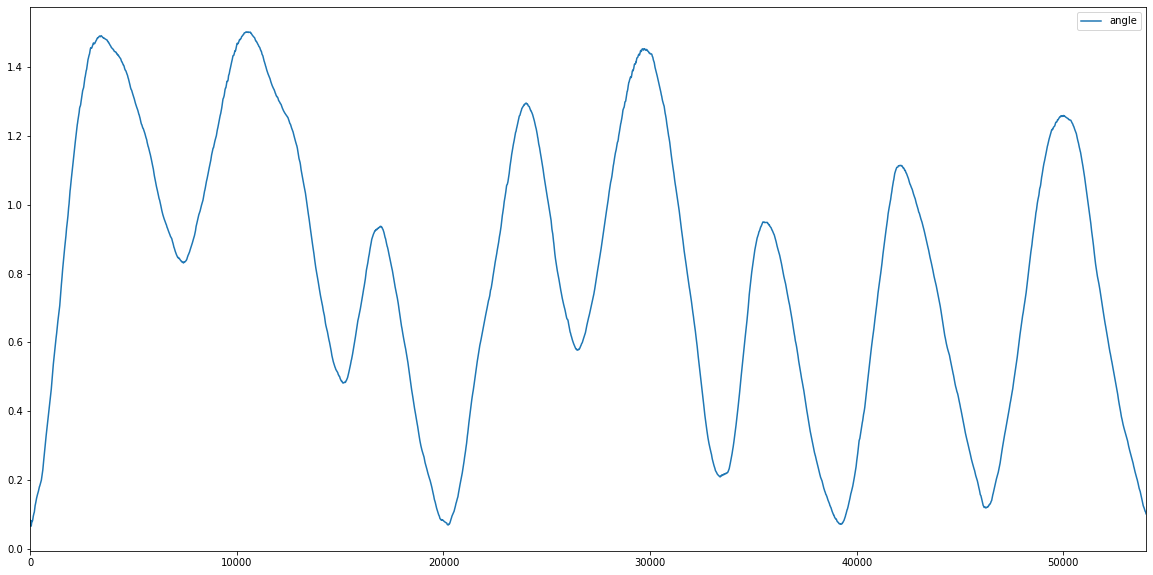

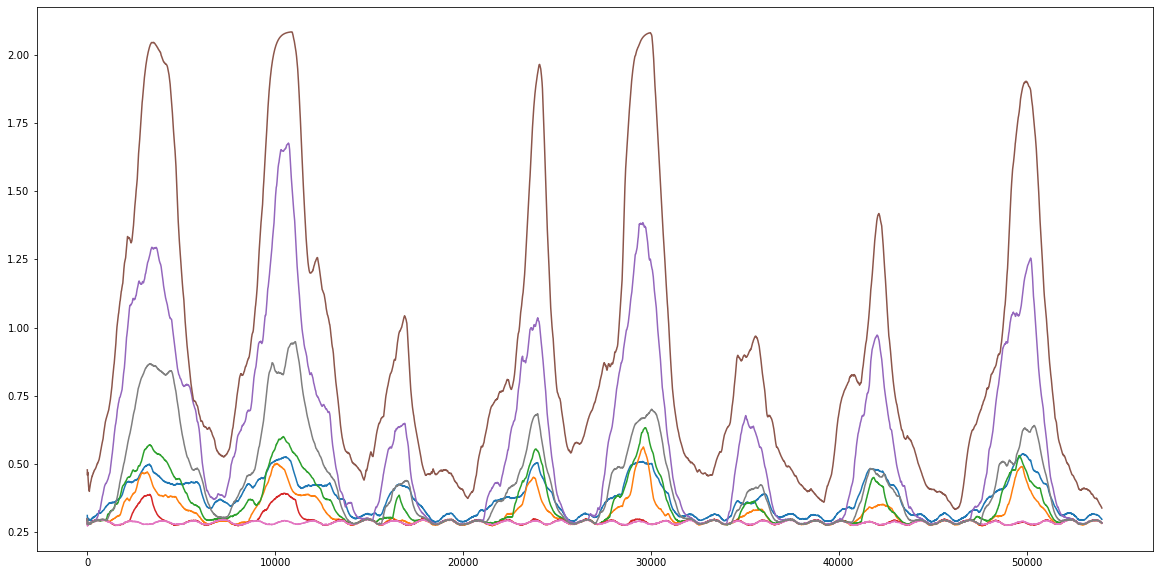

(4491, 100, 8) (710, 100, 8)
23433 2845
Working on dataset: Datasets\SessionToSessionOne.xlsx data_NonUniformWithPause TRAIN SET number 7


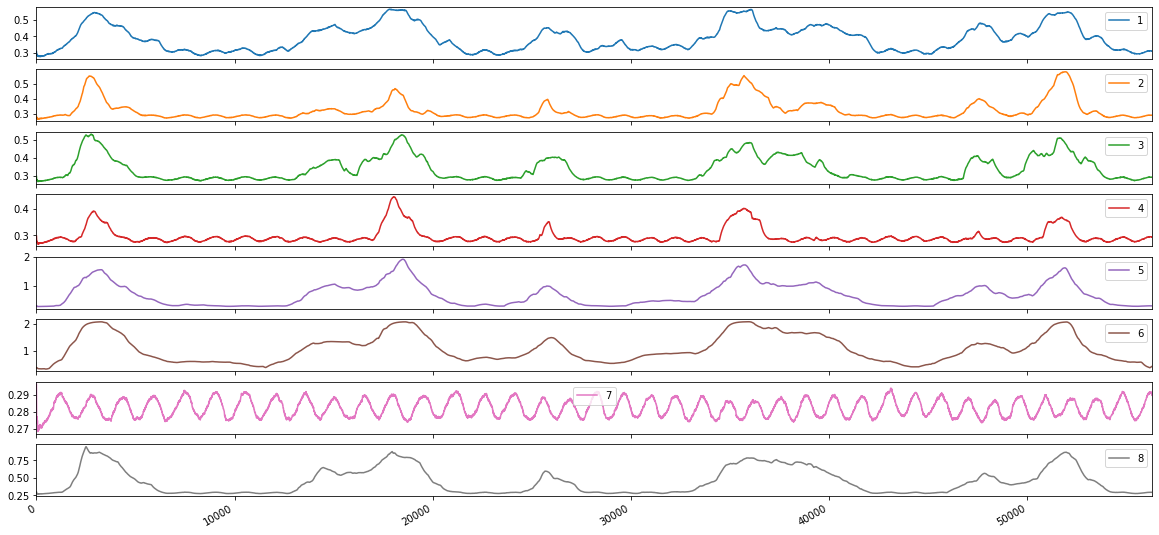

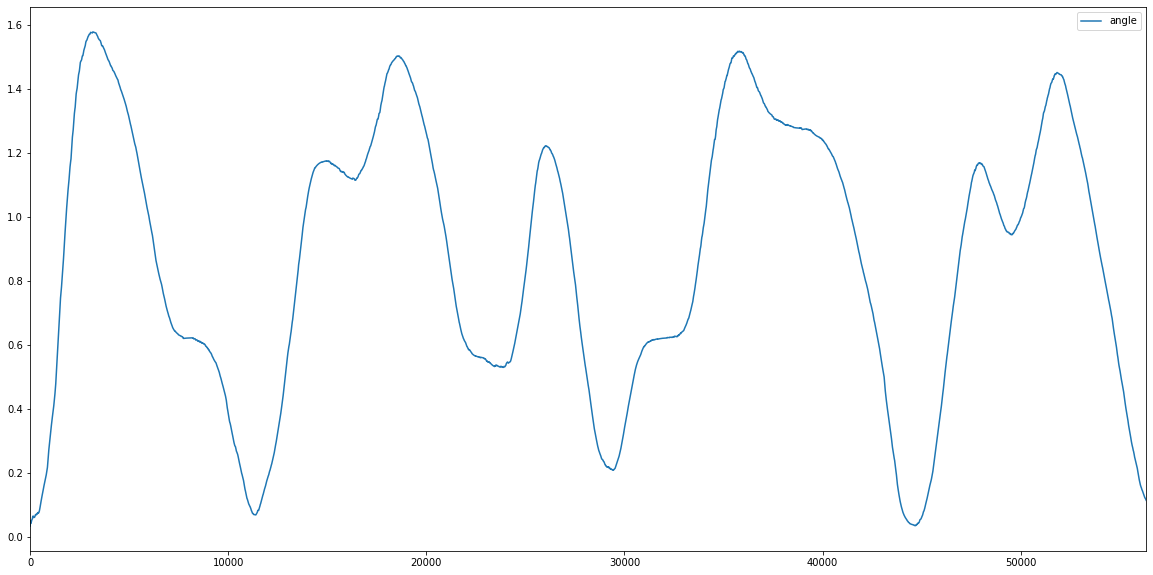

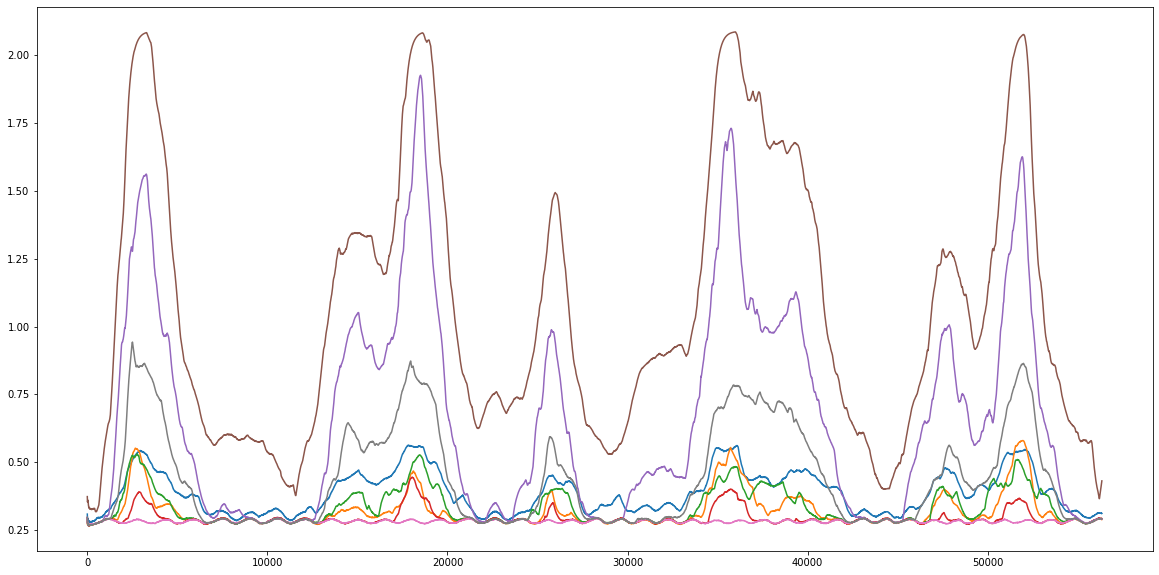

(4689, 100, 8) (745, 100, 8)
28122 3555
Working on dataset: Datasets\SessionToSessionOne.xlsx data_UniformWithPause TRAIN SET number 8


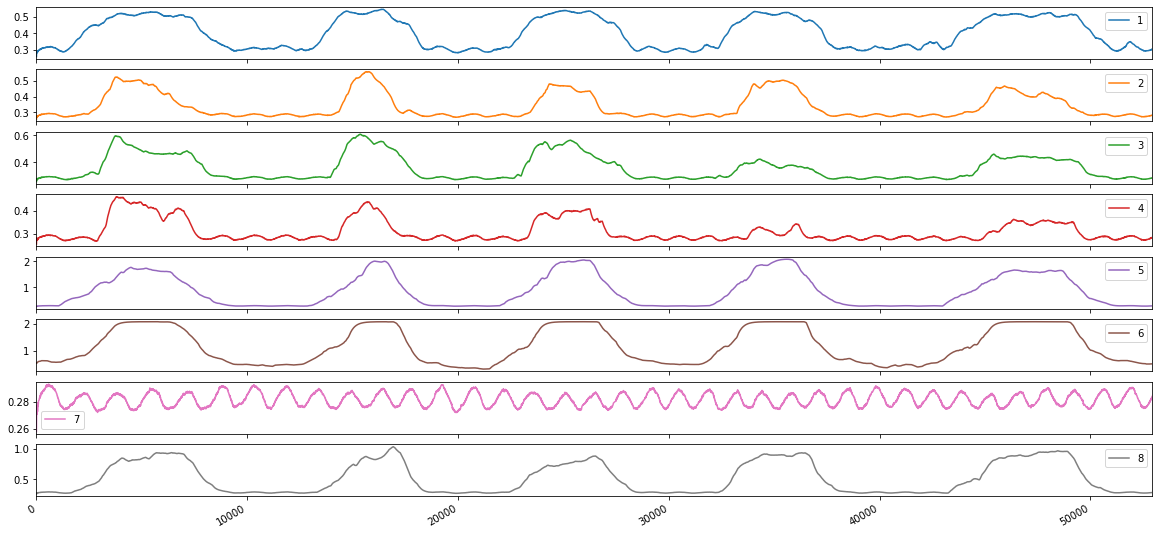

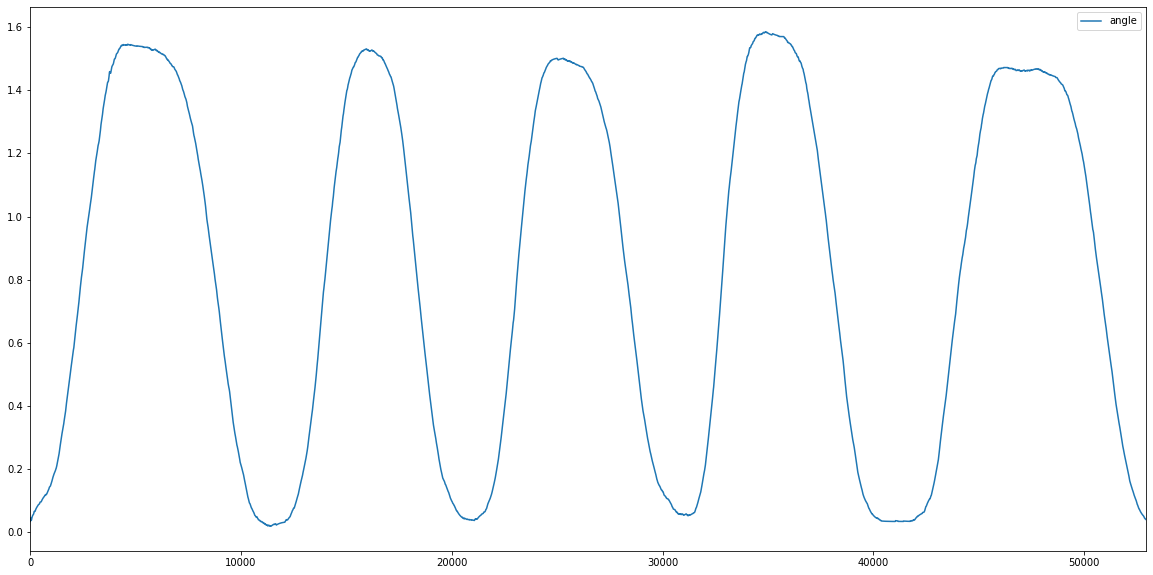

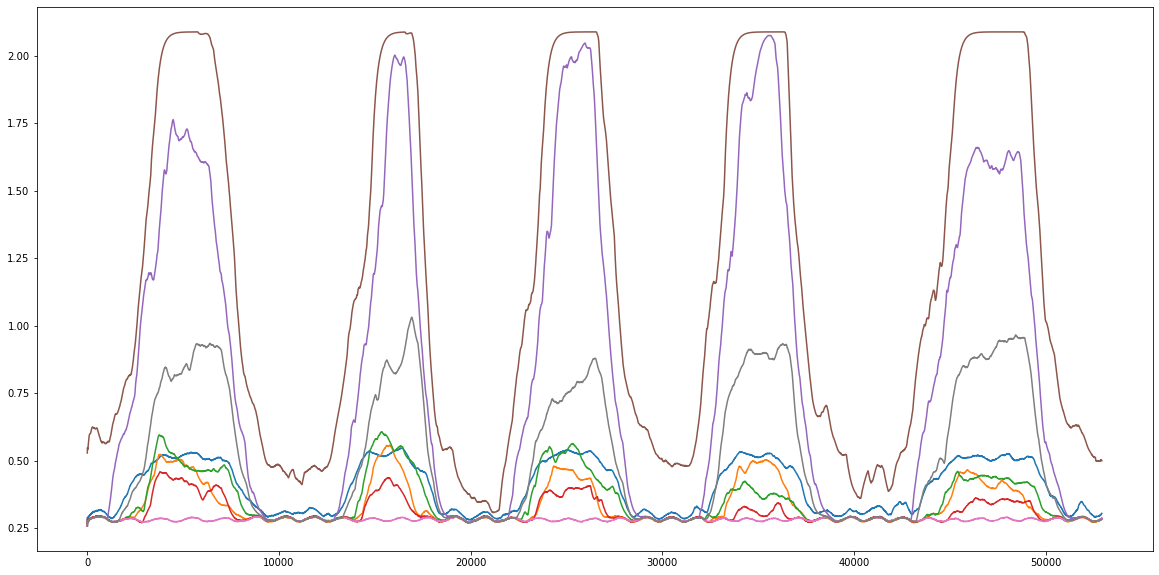

(4400, 100, 8) (694, 100, 8)
32522 4300
Working on dataset: Datasets\SessionToSessionOne.xlsx data_NonUniformTwo TRAIN SET number 9


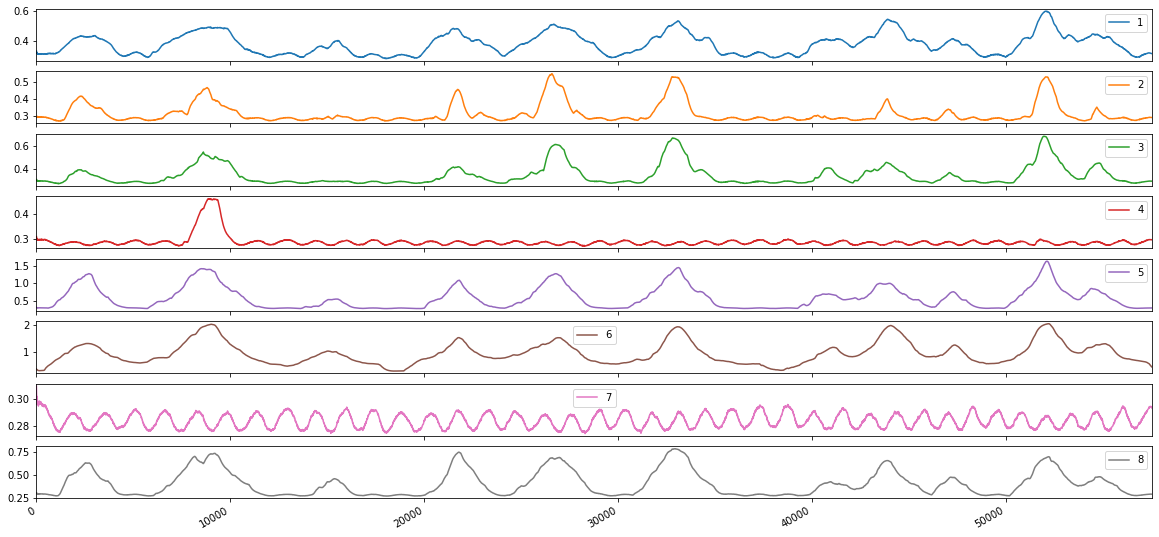

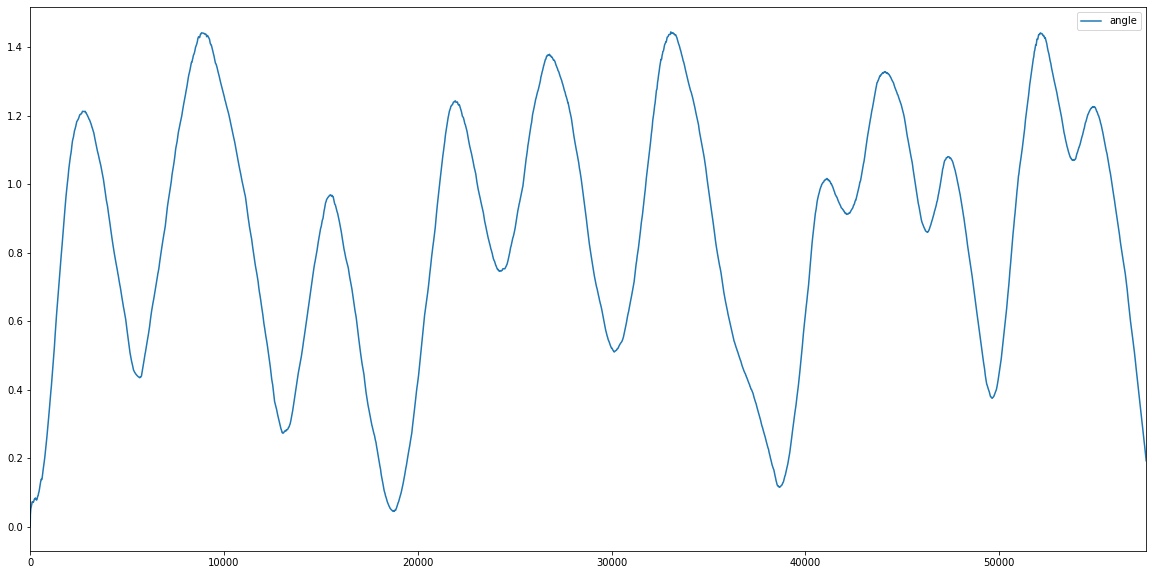

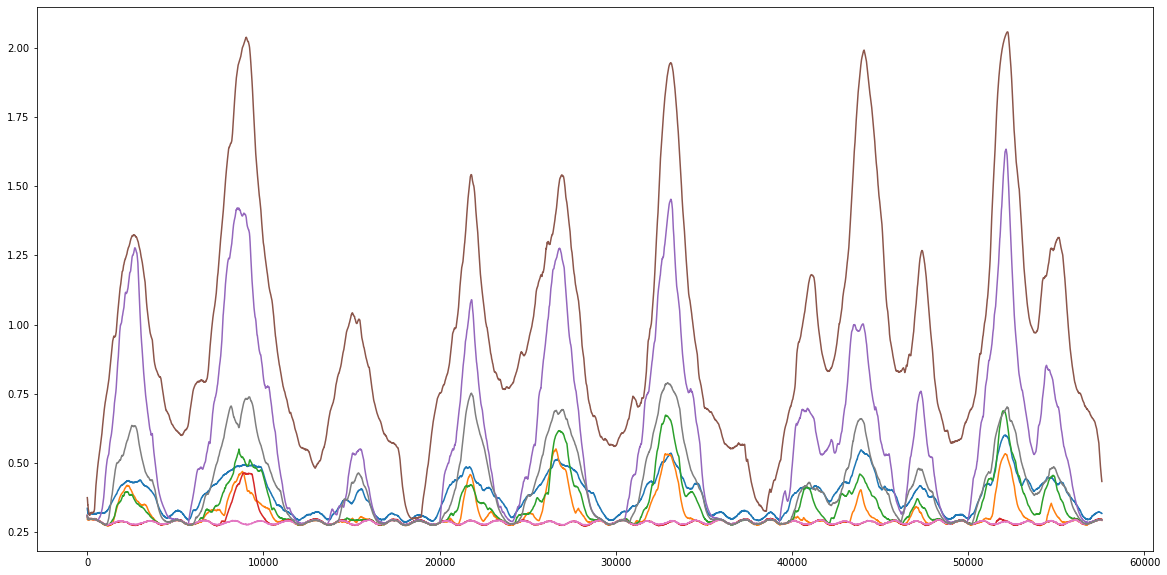

(4795, 100, 8) (763, 100, 8)
37317 4994
Working on dataset: Datasets\SessionToSessionTwo.xlsx data_Uniform TRAIN SET number 10


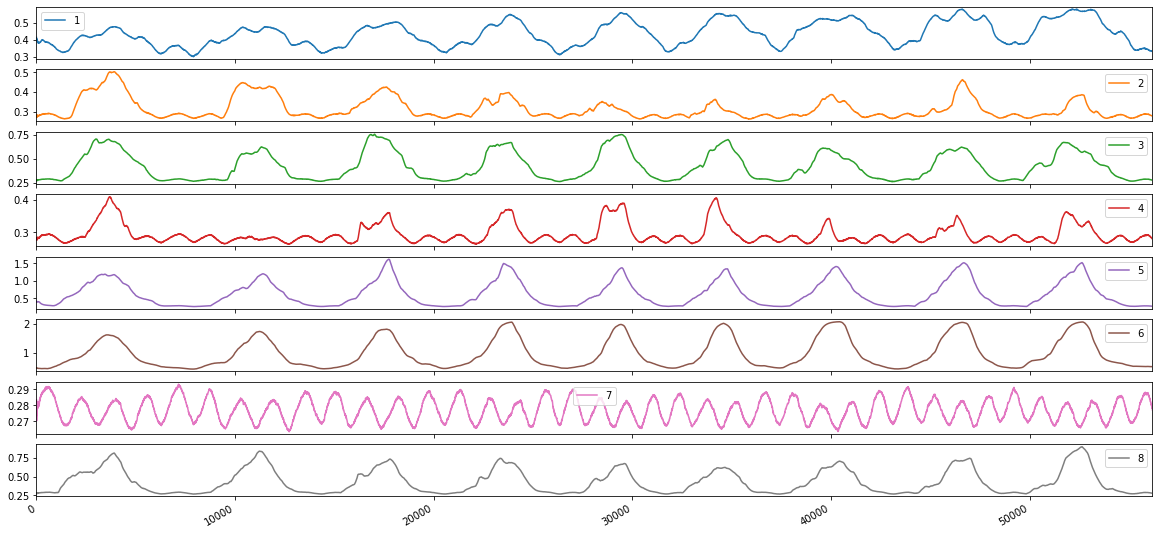

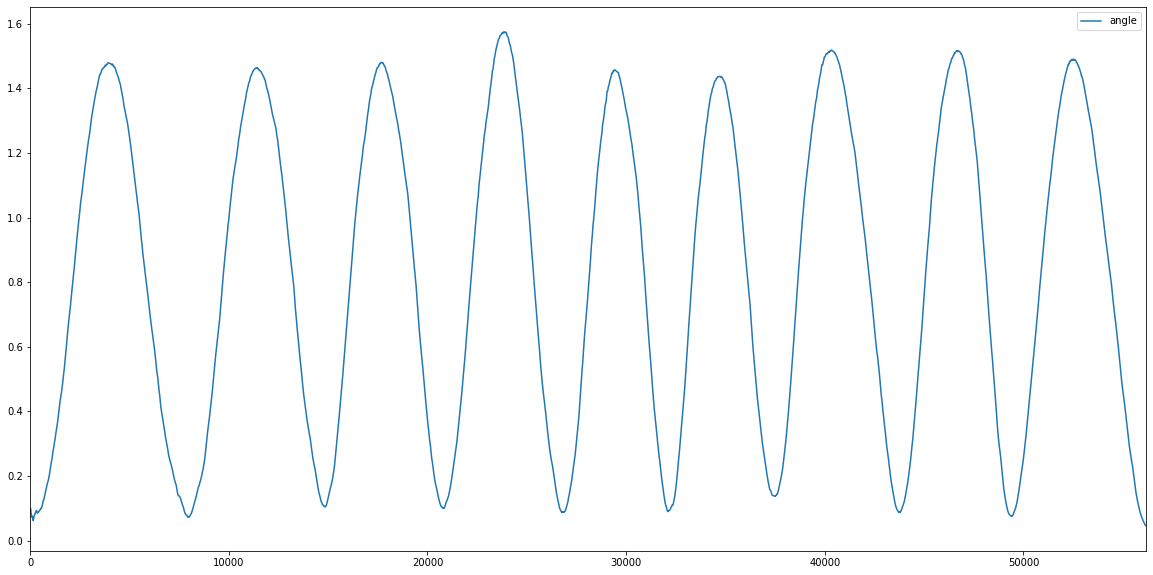

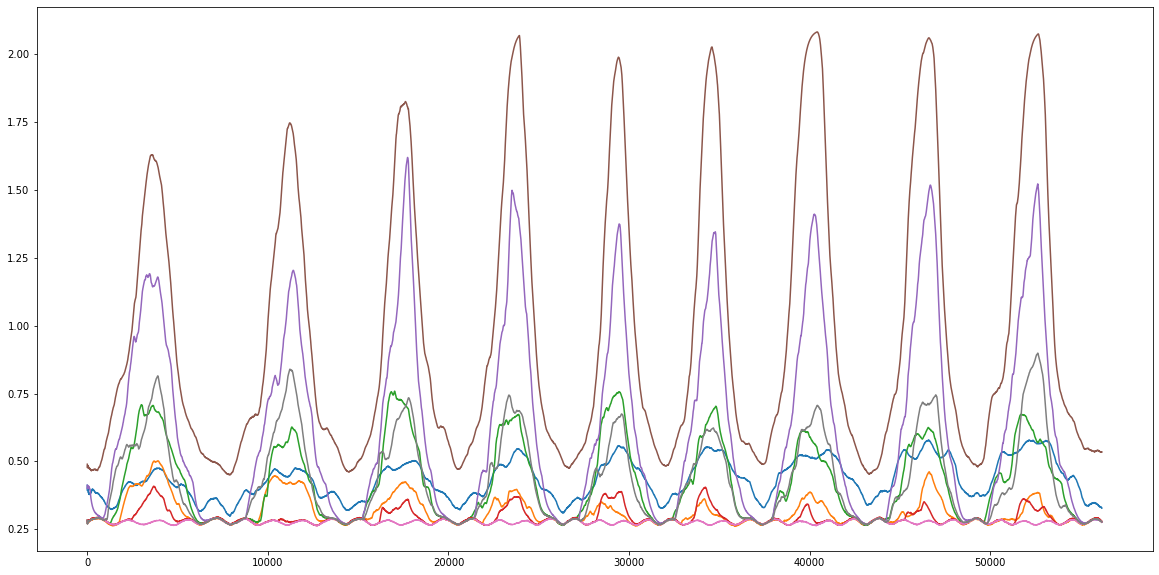

(4676, 100, 8) (742, 100, 8)
41993 5757
Working on dataset: Datasets\SessionToSessionTwo.xlsx data_UniformTwo TRAIN SET number 11


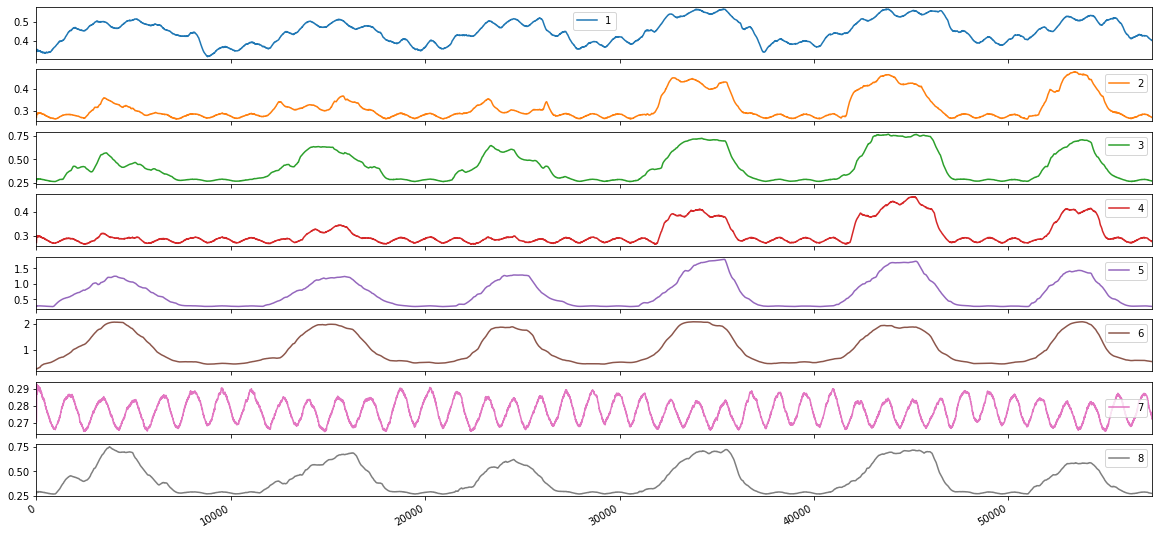

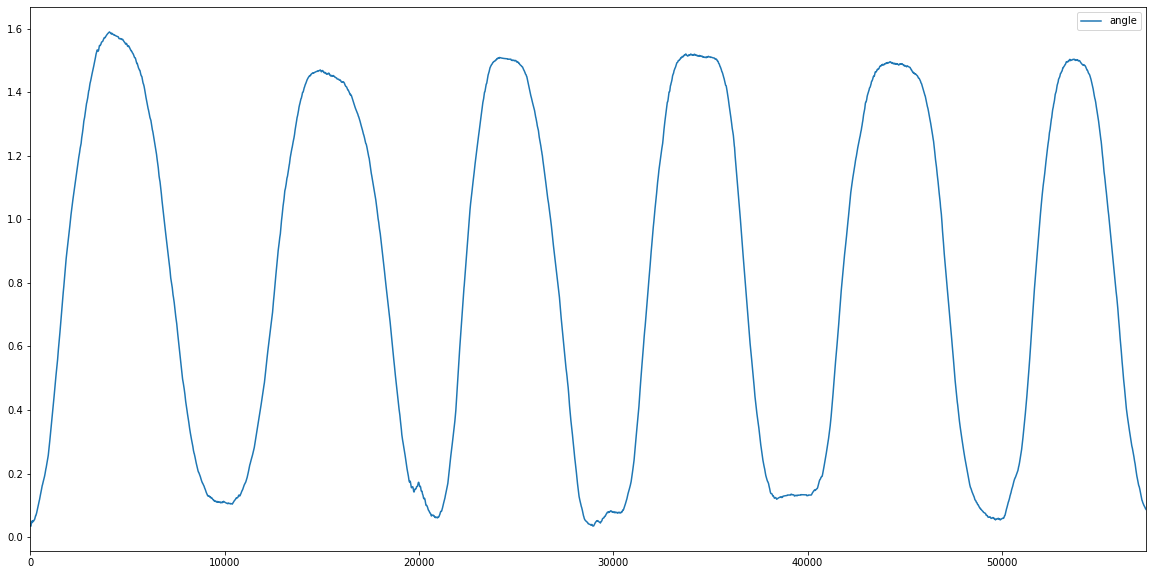

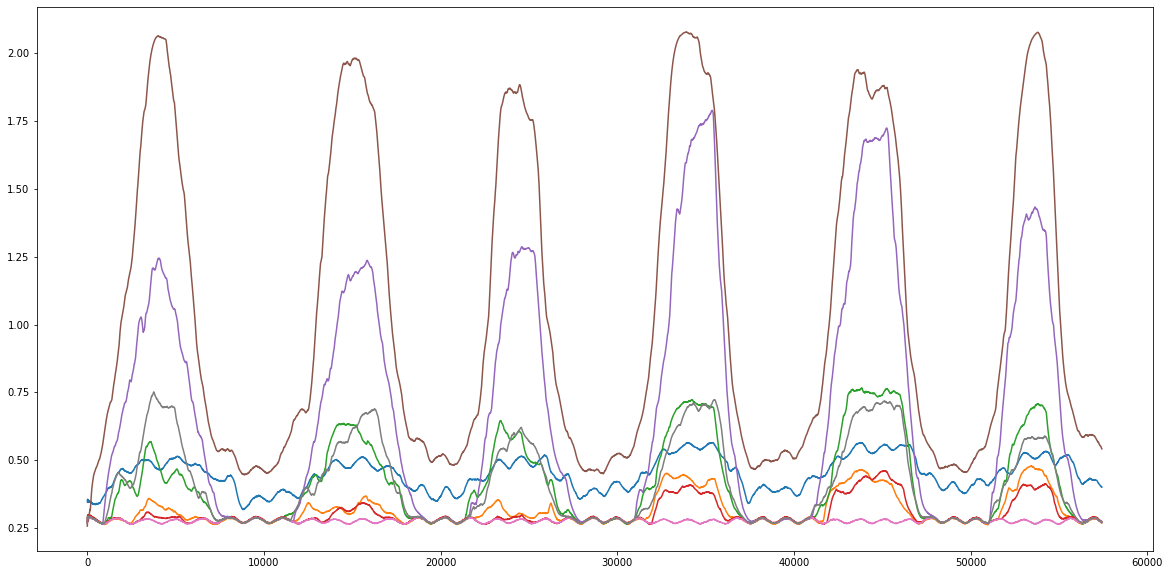

(4781, 100, 8) (761, 100, 8)
46774 6499
Working on dataset: Datasets\SessionToSessionTwo.xlsx data_NonUniform TRAIN SET number 12


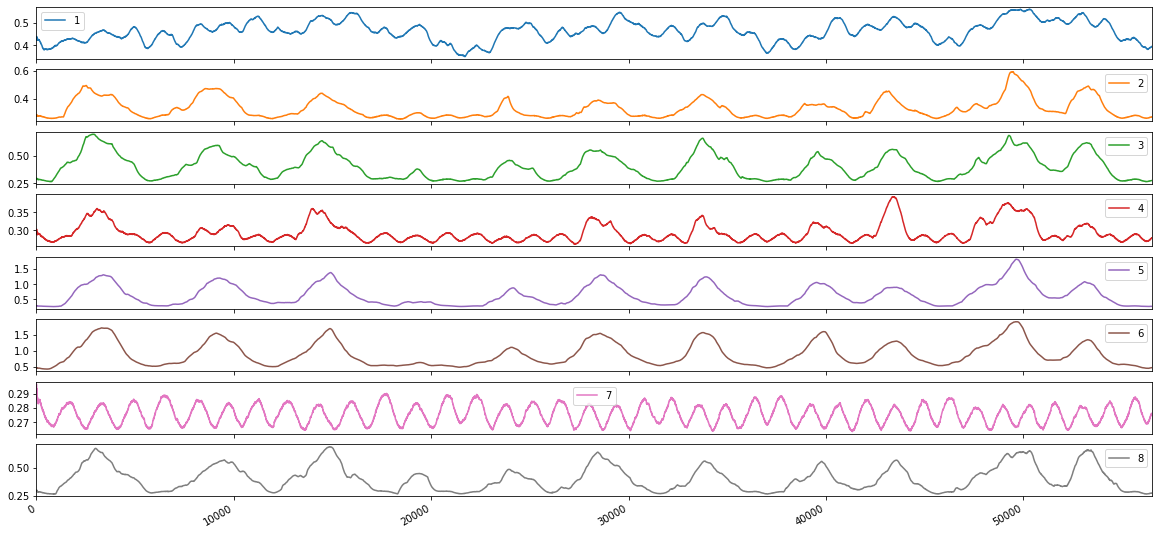

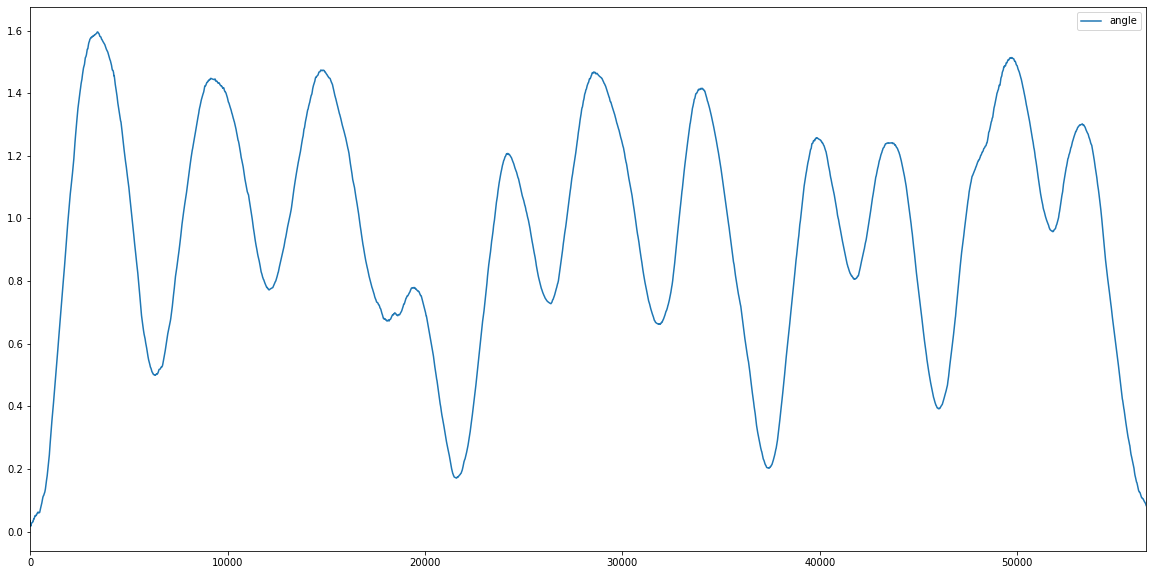

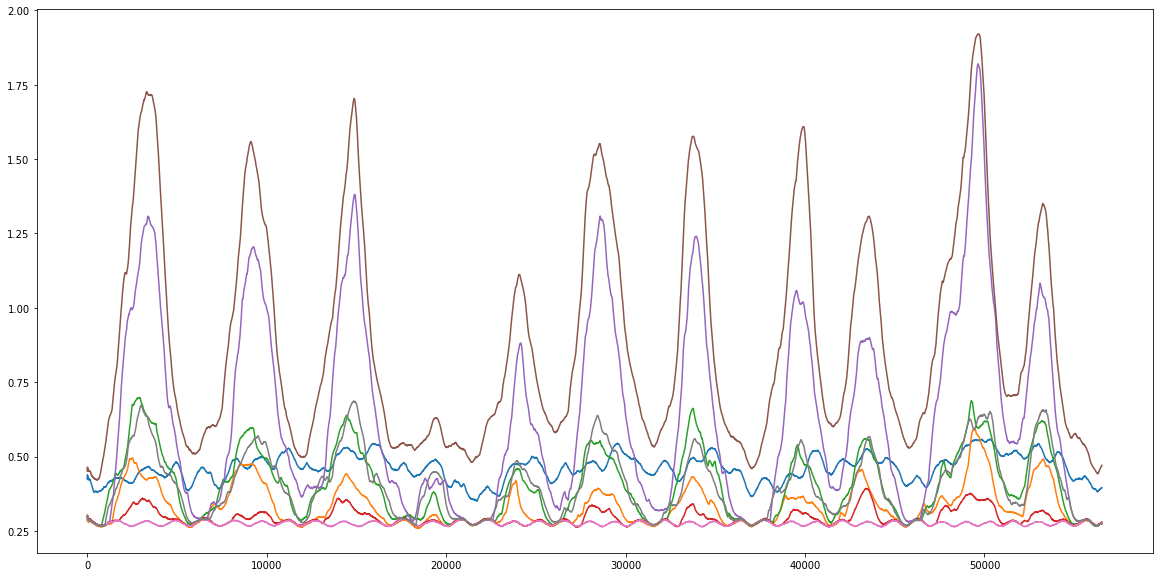

(4706, 100, 8) (748, 100, 8)
51480 7260
Working on dataset: Datasets\SessionToSessionTwo.xlsx data_NonUniformTwo TRAIN SET number 13


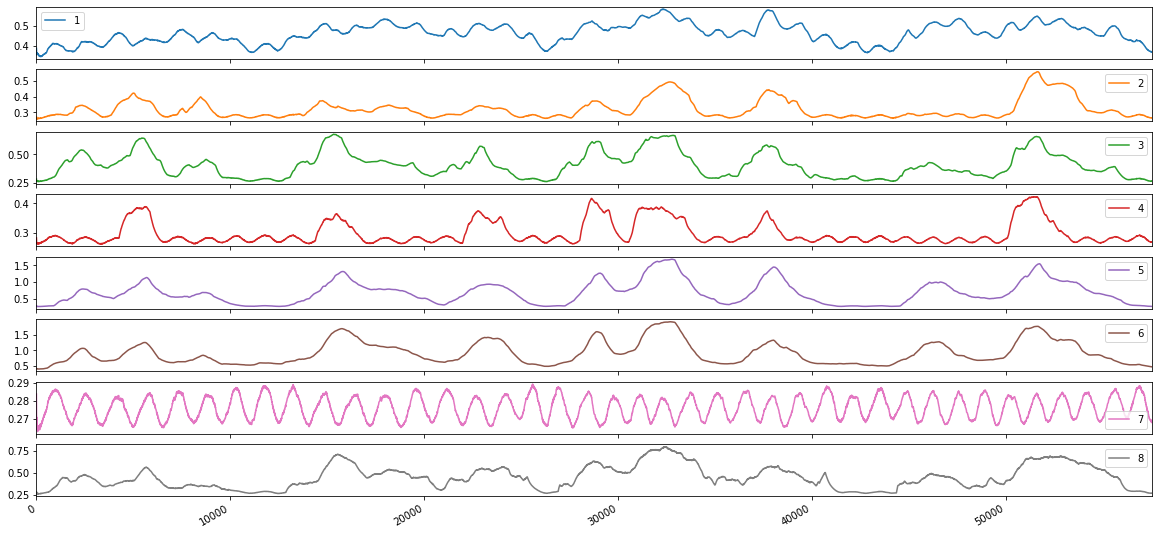

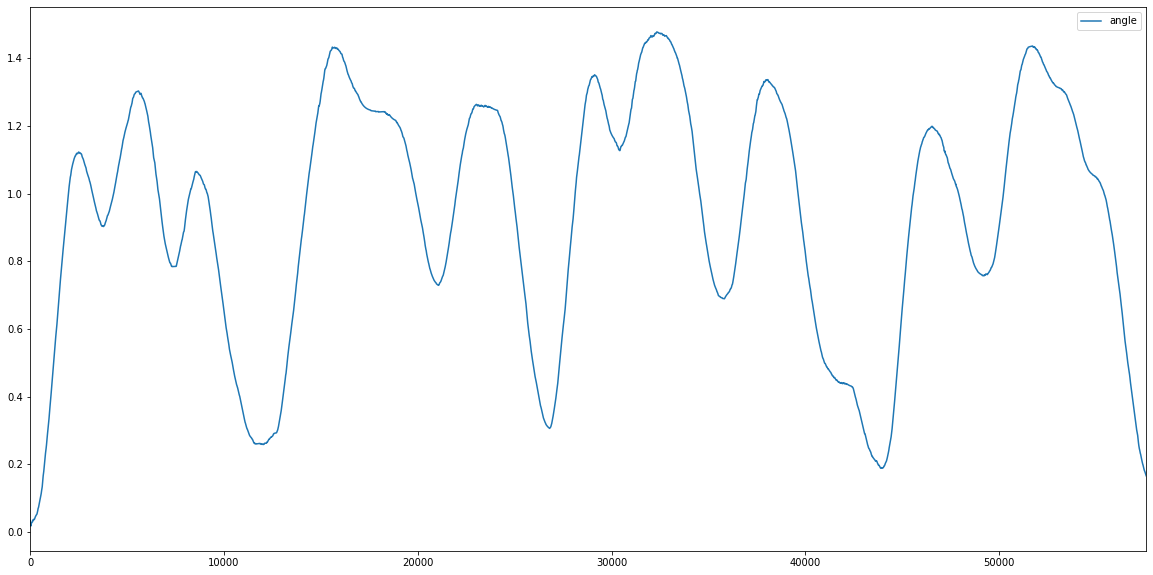

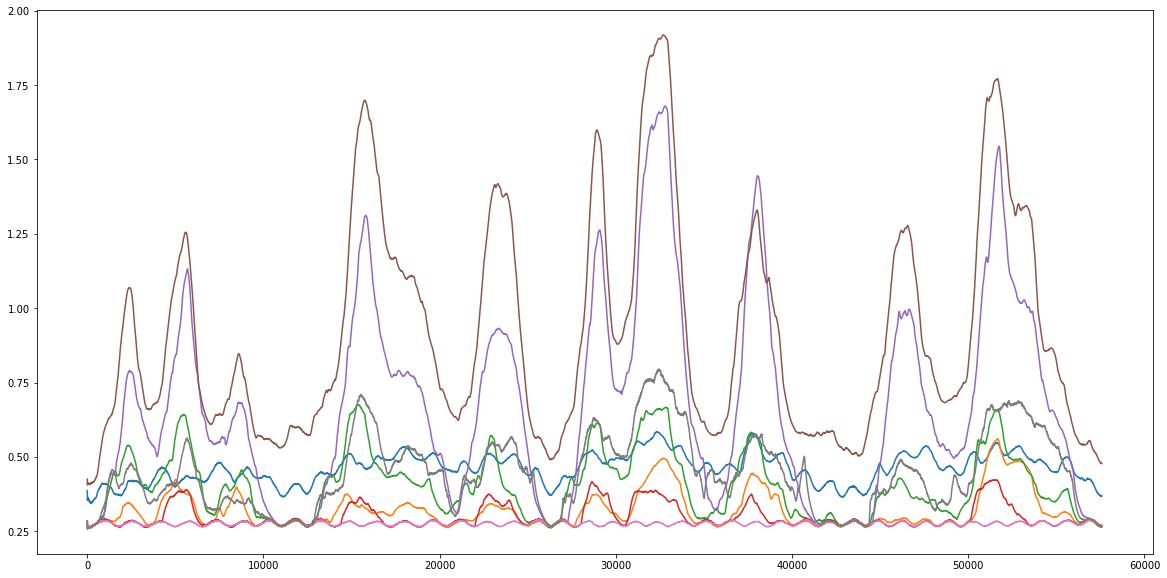

(4795, 100, 8) (763, 100, 8)
56275 8008
Working on dataset: Datasets\SessionToSessionTwo.xlsx data_NonUniformThree TRAIN SET number 14


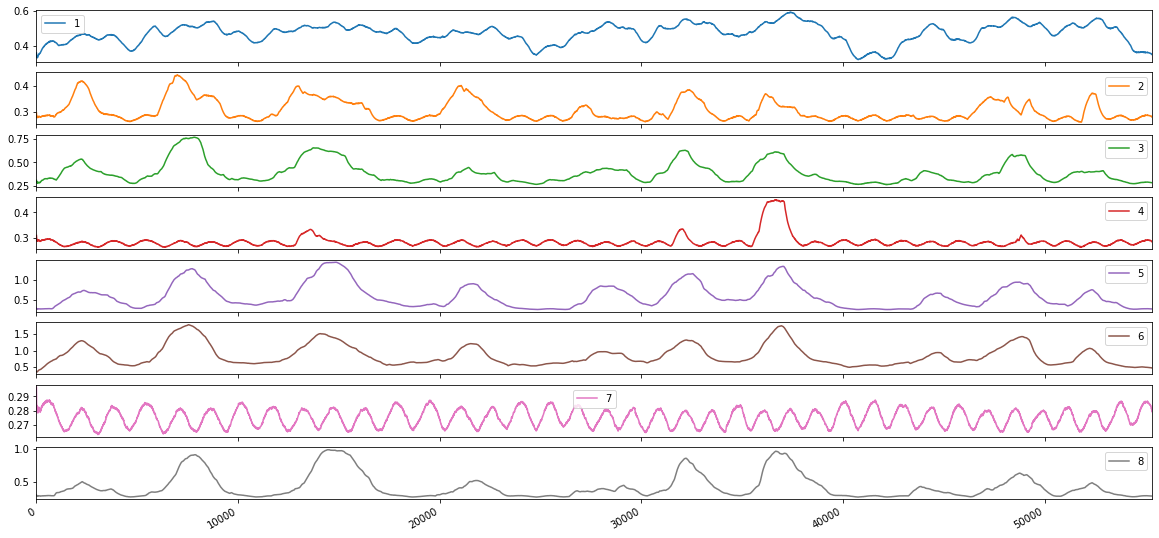

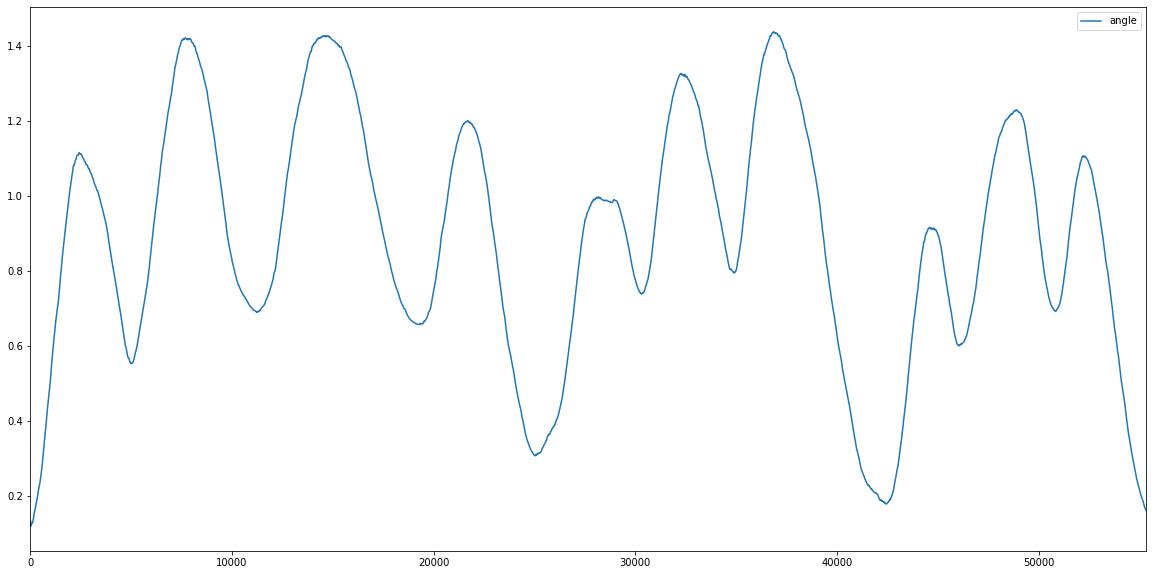

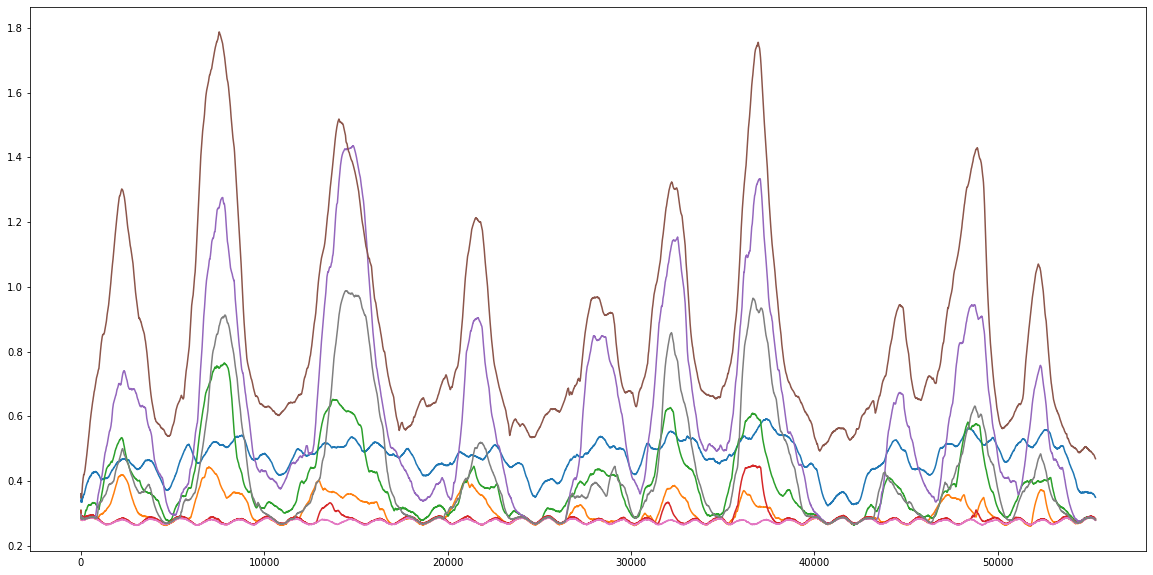

(4604, 100, 8) (730, 100, 8)
60879 8771
Working on dataset: Datasets\SessionToSessionThree.xlsx data_Uniform TRAIN SET number 15


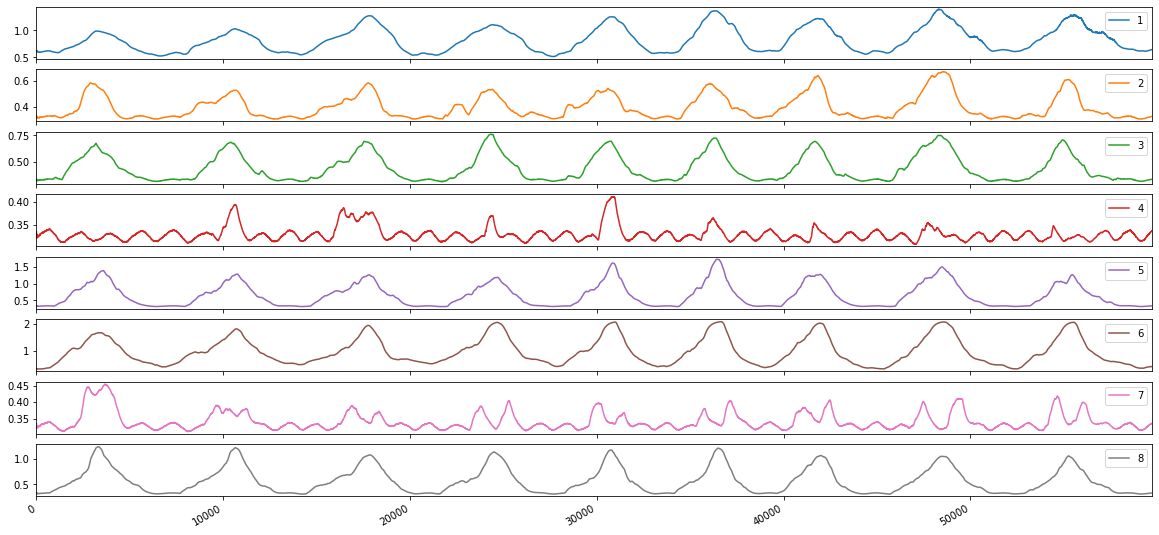

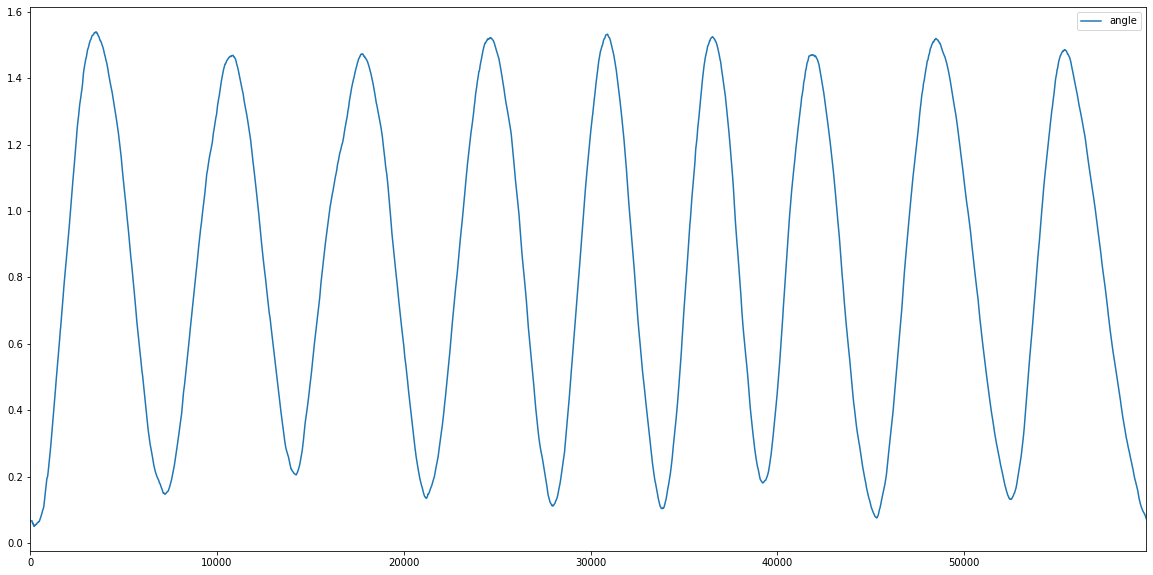

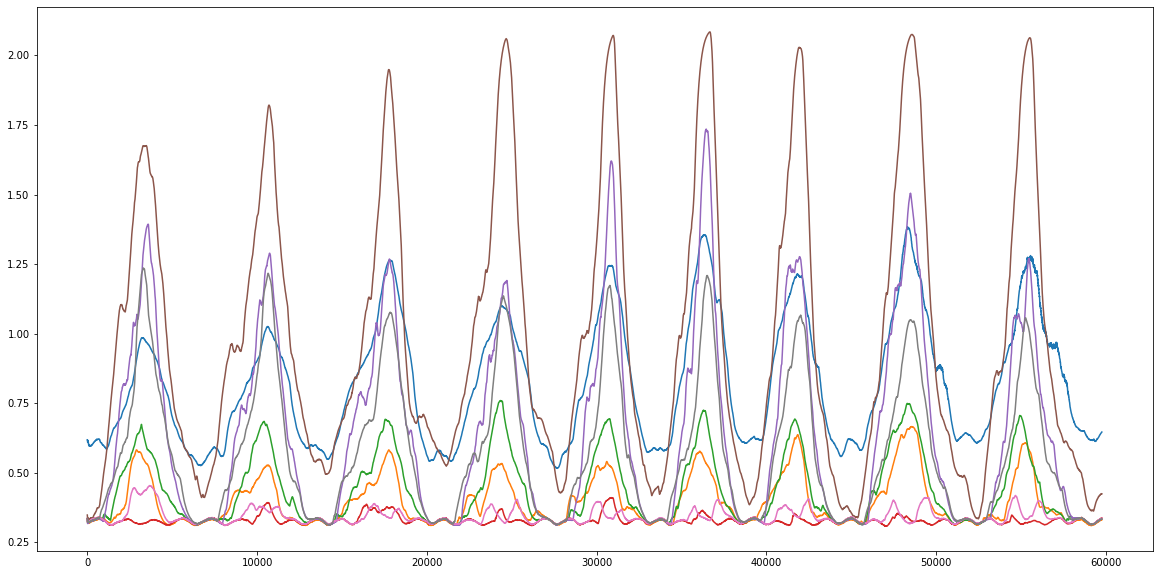

(4979, 100, 8) (796, 100, 8)
65858 9501
Working on dataset: Datasets\SessionToSessionThree.xlsx data_UniformTwo TRAIN SET number 16


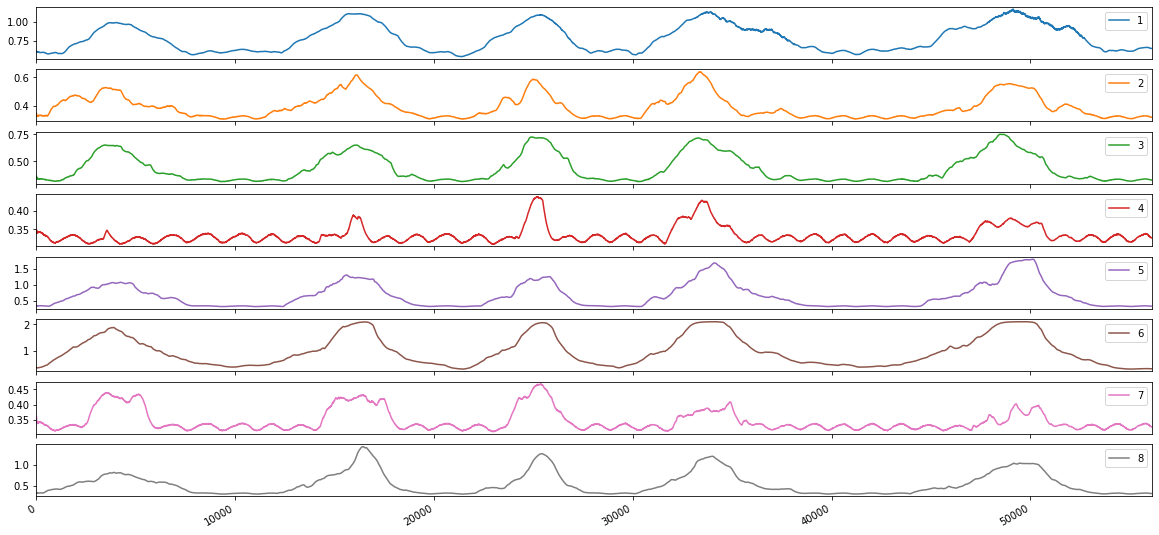

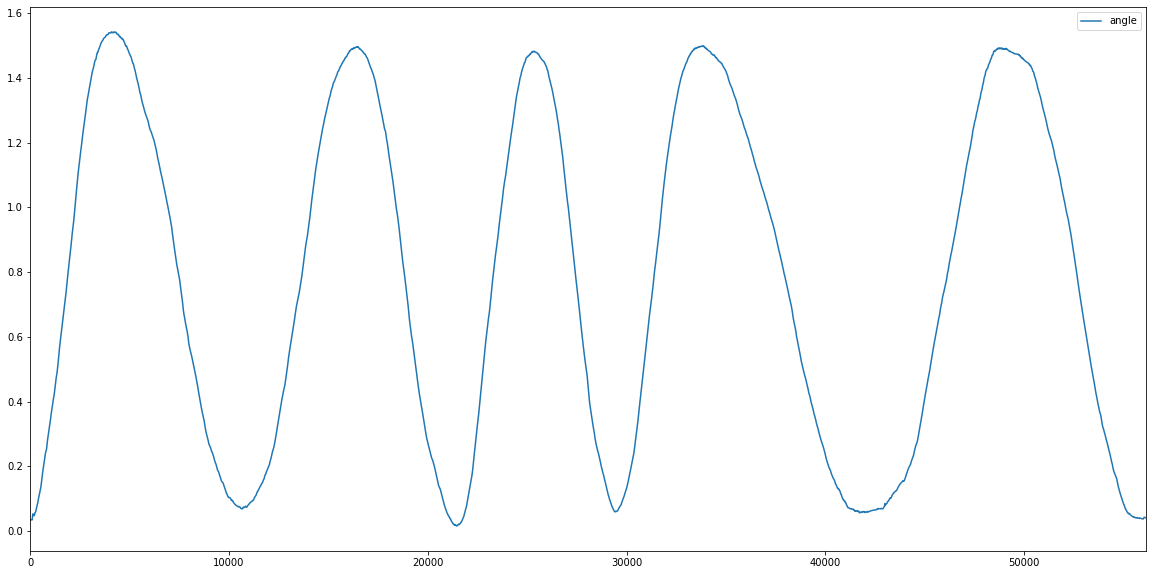

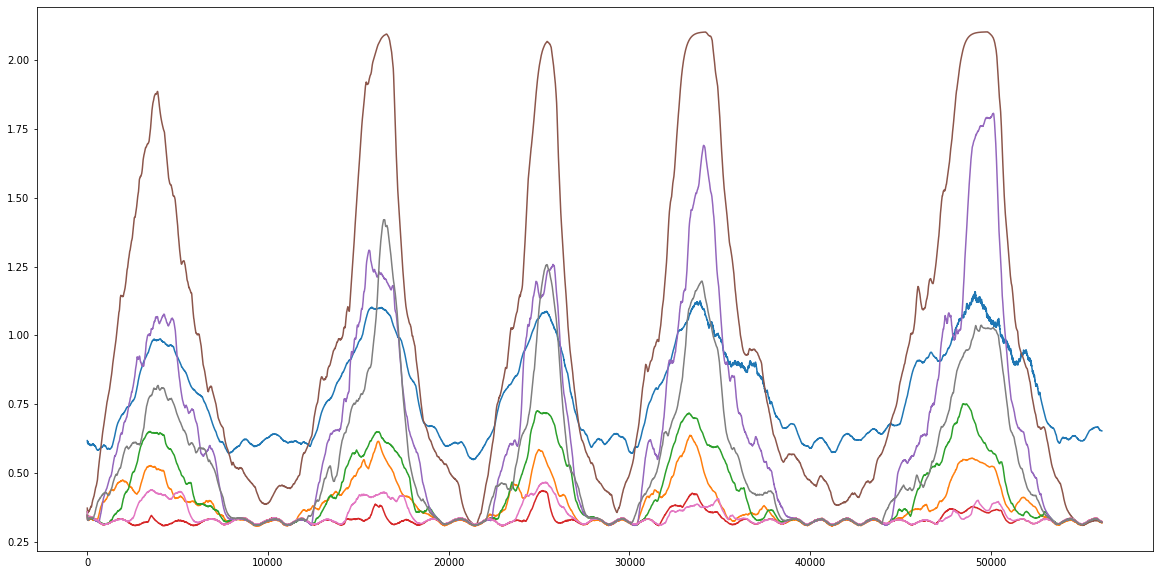

(4672, 100, 8) (742, 100, 8)
70530 10297
Working on dataset: Datasets\SessionToSessionThree.xlsx data_NonUniform TRAIN SET number 17


In [ ]:
DATASET_FILE_PATH=["Datasets\\SingleSessionData.xlsx","Datasets\\SingleSessionData.xlsx","Datasets\\SingleSessionData.xlsx","Datasets\\SingleSessionData.xlsx","Datasets\\SingleSessionData.xlsx","Datasets\\SessionToSessionOne.xlsx","Datasets\\SessionToSessionOne.xlsx","Datasets\\SessionToSessionOne.xlsx","Datasets\\SessionToSessionOne.xlsx","Datasets\\SessionToSessionOne.xlsx","Datasets\\SessionToSessionTwo.xlsx","Datasets\\SessionToSessionTwo.xlsx","Datasets\\SessionToSessionTwo.xlsx","Datasets\\SessionToSessionTwo.xlsx","Datasets\\SessionToSessionTwo.xlsx","Datasets\\SessionToSessionThree.xlsx","Datasets\\SessionToSessionThree.xlsx","Datasets\\SessionToSessionThree.xlsx","Datasets\\SessionToSessionThree.xlsx","Datasets\\SessionToSessionThree.xlsx","Datasets\\SessionToSessionFour.xlsx","Datasets\\SessionToSessionFour.xlsx","Datasets\\SessionToSessionFour.xlsx","Datasets\\SessionToSessionFour.xlsx","Datasets\\SessionToSessionFour.xlsx"]
DATASET_SHEET_TITLE=["data_Uniform","data_NonUniform","data_NonUniformWithPause","data_NonUniformTwo","data_UniformWithPause","data_Uniform","data_NonUniform","data_NonUniformWithPause","data_UniformWithPause","data_NonUniformTwo","data_Uniform","data_UniformTwo","data_NonUniform","data_NonUniformTwo","data_NonUniformThree","data_Uniform","data_UniformTwo","data_NonUniform","data_NonUniformTwo","data_NonUniformThree","data_NonUniform","data_NonUniformTwo","data_NonUniformThree","data_Uniform","data_UniformTwo"]
GRANULARITY=10
STEP_SIZE_SLIDING_WINDOW=1
PAST_HISTORY=100
FUTURE_TARGET=1
VAL_PERCENT=0.15
EPOCHS=100 # Max epochs, in case early stopping doesn't take effect
MIN_DELTA=0.0005
PATIENCE=10
BATCH_SIZE=5000
SMOOTHING=50
SHUFFLE_BUFFER_SIZE=0
MEAN=False
USE_REF_POINTS=False
REF_POINT1=0
REF_POINT2=7

plt.rcParams["figure.figsize"] = (20,10)

# Load data
batch_train, batch_val, batch_test, test_ground_truth, train_slices, val_slices, test_data_indexes, data_shape = process_data(
    DATASET_FILE_PATH, DATASET_SHEET_TITLE, GRANULARITY, SMOOTHING, VAL_PERCENT, PAST_HISTORY, 
    FUTURE_TARGET, STEP_SIZE_SLIDING_WINDOW, BATCH_SIZE, EPOCHS, SHUFFLE_BUFFER_SIZE, MEAN, 
    USE_REF_POINTS, REF_POINT1, REF_POINT2)

In [ ]:
ATTEMPT_NAME="CNN_BASELINE"
KERNEL_SIZE=10
FILTERS=32
PADDING="valid"

model, training_history, training_time = run_cnn(data_shape, batch_train, batch_val, train_slices, val_slices, BATCH_SIZE, EPOCHS, FUTURE_TARGET, KERNEL_SIZE, FILTERS, PADDING, MIN_DELTA, PATIENCE) 
evaluate_results(model, training_history, test_ground_truth, batch_test, test_data_indexes, training_time)

In [ ]:
ATTEMPT_NAME="NN_BASELINE"
DENSE_SIZE = 32
DENSE_LAYER_NUM = 1

model, training_history, training_time = run_nn(data_shape, batch_train, batch_val, train_slices, val_slices, BATCH_SIZE, EPOCHS, FUTURE_TARGET, DENSE_SIZE, DENSE_LAYER_NUM, MIN_DELTA, PATIENCE)
evaluate_results(model, training_history, test_ground_truth, batch_test, test_data_indexes, training_time)

In [ ]:
ATTEMPT_NAME="LSTM_BASELINE"
LAYER_SIZE = 32

run_lstm(data_shape, batched_train_data, batched_val_data, train_slices, val_slices, BATCH_SIZE, EPOCHS, FUTURE_TARGET, MIN_DELTA, PATIENCE, LAYER_SIZE)
evaluate_results(model, training_history, test_ground_truth, batch_test, test_data_indexes, training_time)

In [ ]:
ATTEMPT_NAME="PARALLEL_BASELINE"
KERNEL_SIZE=10
FILTERS=32
PADDING="valid"
LAYER_SIZE = 32

run_parallel(data_shape, batched_train_data, batched_val_data, train_slices, val_slices, BATCH_SIZE, EPOCHS, FUTURE_TARGET, MIN_DELTA, PATIENCE, KERNEL_SIZE, FILTERS, PADDING, LAYER_SIZE)

In [ ]:
ATTEMPT_NAME="PARALLEL_DEEP"
KERNEL_SIZE=10
FILTERS=32
PADDING="valid"
LAYER_SIZE = 32
DENSE_SIZE = 32

run_parallel_deep(data_shape, batched_train_data, batched_val_data, train_slices, val_slices, BATCH_SIZE, EPOCHS, FUTURE_TARGET, MIN_DELTA, PATIENCE, KERNEL_SIZE, FILTERS, PADDING, LAYER_SIZE, DENSE_SIZE)